# OBJECTIVE
- The purpose of this script is to analyze and find insights about the EMR Sightings dataset.

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
from datetime import datetime
#from sklearn.model_selection import train_test_split
import sklearn as sl
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",200)
emr_data=pd.read_csv('C:/Users/oscarahe/OneDrive - Intel Corporation/Desktop/Exceles/query2.csv')
emr_data


,id,rev,is_current,updated_date,system_updated_date,read_grps,read_grps_id,subject,tenant,submitted_date,locked_date,closed_date,eta,eta_request,sla_response_date,sla_resolution_date,sla_resolution_resume_date,sla_response_resume_date,sighting.open_date,sighting.root_caused_date,sighting.defined_date,sighting.fix_eta,sighting.fix_eta_2,sighting.fix_eta_3,permission_override,internal_state,link_order,is_synced,sla_custom_resolution_time,sighting.rank,sighting.is_prj_admin,sighting.days_debugging,sighting.days_validating,sighting.days_debug_level1,sighting.days_debug_level2,sighting.forum_level_min,sighting.days_waiting,sighting.days_to_root_caused,sla_resolution_time_remaining,parent_id,from_id,eid,native,link_type,lineage,origin_id,tran_id,concat_read_grps_id,concat_write_grps_id,source_read_grps_id,source_write_grps_id,write_grps_id,submitted_by,updated_by,locked_by,owner,from_tenant,closed_by,sync_action,nickname,priority,relationship,relationship_action,context,release,classification,component,reason,sla_response_met,sla_resolution_met,family,send_mail,kinship,link_direction,from_subject,from_release,clone_status,status,status_mapped_current,domain,sighting.conclusion,sighting.conclusion_mapped1,sighting.conclusion_mapped2,sighting.env_found,sighting.fix_status,sighting.forum,sighting.status_mode,sighting.team_found,sighting.merge_id,sighting.forum_level,sighting.errata_status,sighting.fix_category,sighting.fix_category_3,sighting.fix_lifetime,sighting.fix_status_3,sighting.fix_category_2,sighting.fix_type,sighting.fix_type_3,sighting.fix_status_2,sighting.fix_type_2,...,sighting_central.sighting.total_days_new,sighting_central.sighting.env_affected,sighting_central.sighting.date_shipment_received,sighting_central.sighting.dpm,sighting_central.sighting.ppvm_bin,sighting_central.sighting.ppvm_bin_description,sighting_central.sighting.ppvs_bin,sighting_central.sighting.ppv_tp,sighting_central.sighting.ppvs_bin_description,sighting_central.sighting.class_tp,sighting_central.sighting.class_rv_results,sighting_central.sighting.unit_location,sighting_central.sighting.dpm_type,sighting_central.sighting.ce_support,sighting_central.sighting.ppv_rv_results,sighting_central.sighting.ww_decima,sighting_central.sighting.beat_classification,sighting_central.sighting.beat_common_test_plan,sighting_central.sighting.beat_when_expected,sighting_central.sighting.beat_who_should_have_found,sighting_central.sighting.beat_detection_complexity,sighting_central.sighting.beat_qe_required,sighting_central.sighting.days_awaiting_review,sighting_central.sighting.date_awaiting_review,sampletime,ww,ww_updated_date,ww_system_updated_date,ww_submitted_date,ww_locked_date,ww_closed_date,ww_eta,ww_eta_request,ww_sla_response_date,ww_sla_resolution_date,ww_sla_resolution_resume_date,ww_sla_response_resume_date,sighting.ww_open_date,sighting.ww_root_caused_date,sighting.ww_closed_aaron,sighting.ww_defined_date,sighting.ww_fix_eta,sighting.ww_fix_eta_2,sighting.ww_fix_eta_3,sighting_central.sighting.ww_date_open_new,sighting_central.sighting.ww_date_rootcause_validate,sighting_central.sighting.ww_date_assigned,sighting_central.sighting.ww_preventive_action_eta,sighting_central.sighting.ww_date_shipment_received,sighting_central.sighting.ww_date_awaiting_review,sighting_central.sighting.beat_other_test_plan,sighting_central.sighting.sysdbg_notes1,sighting_central.sighting.sysdbg_notes2,sighting_central.sighting.sysdbg_agenda,sighting_central.sighting.sysdbg_tag,sighting_central.sighting.fix_stepping,sighting_central.sighting.dram_die_width,sighting_central.sighting.dram_rank,sighting_central.sighting.dimm_type,sighting_central.sighting.dram_vendor,sighting_central.sighting.package_die_stack,sighting_central.sighting.dram_die_density,sighting_central.sighting.dram_package_densitycapacity,sighting_central.sighting.days_awaiting_3rd_party,sighting_central.sighting.days_awaiting_user,sighting_central.sighting.sysdbg_name1,sighting_central.sighting.sysdbg_name3,sigh

In [2]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


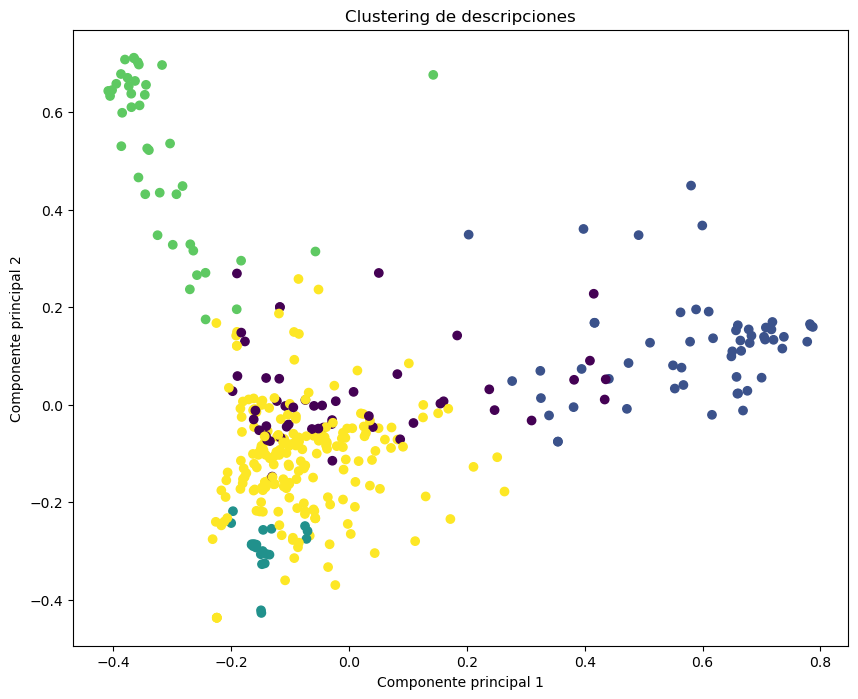


Cluster 0
font (apariciones: 61)
color (apariciones: 128)
roboto (apariciones: 59)
ui (apariciones: 40)
segoe (apariciones: 39)
nbsp (apariciones: 321)
new (apariciones: 61)
span (apariciones: 275)
courier (apariciones: 36)
quot (apariciones: 133)

Cluster 1
courier (apariciones: 36)
gt (apariciones: 109)
calibri (apariciones: 79)
quot (apariciones: 133)
br (apariciones: 361)
msonormal (apariciones: 69)
error (apariciones: 111)
div (apariciones: 158)
span (apariciones: 275)
nbsp (apariciones: 321)

Cluster 2
rgb (apariciones: 191)
bios (apariciones: 118)
xcc (apariciones: 64)
color (apariciones: 128)
txv (apariciones: 19)
failing (apariciones: 51)
rgba (apariciones: 32)
release (apariciones: 39)
purple (apariciones: 22)
upm (apariciones: 21)

Cluster 3
top (apariciones: 42)
right (apariciones: 26)
padding (apariciones: 55)
msonormal (apariciones: 69)
center (apariciones: 40)
height (apariciones: 50)
td (apariciones: 84)
none (apariciones: 65)
windowtext (apariciones: 38)
solid (aparic

In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

# Descargar recursos necesarios de NLTK
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

# Paso 1: Leer el archivo CSV
file_path = 'C:/Users/oscarahe/OneDrive - Intel Corporation/Desktop/Exceles/query2.csv'  # Reemplaza con la ruta de tu archivo
df = pd.read_csv(file_path)

# Paso 2: Limpiar los datos
df = df.dropna(subset=['description'])

# Preprocesamiento con NLTK
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Tokenizar
    tokens = nltk.word_tokenize(text.lower())
    # Lematizar y eliminar stopwords
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token.isalpha() and token not in stop_words]
    return ' '.join(tokens)

df['description'] = df['description'].apply(preprocess_text)

# Paso 3: Vectorizar los textos
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['description'])

# Paso 4: Aplicar el algoritmo de clustering
num_clusters = 5  # Ajusta según tus necesidades
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)
df['cluster'] = kmeans.labels_

# Visualización y guardado de la imagen
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering de descripciones')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
#plt.savefig('/nfs/site/home/mhsantan/from_local/query2_clustering_output_2.png')  # Guardar la imagen
plt.show()

# Otras formas de analizar el clustering

# 1. Palabras clave por cluster con número de apariciones
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    for i, r in df.iterrows():
        print(f'\nCluster {i}')
        top_terms = np.argsort(r)[-n_terms:]
        for t in top_terms:
            term = labels[t]
            count = (data[:, t].toarray() > 0).sum()
            print(f'{term} (apariciones: {count})')

# Mostrar las palabras clave más representativas de cada cluster
terms = vectorizer.get_feature_names_out()
get_top_keywords(X, kmeans.labels_, terms, 10)

# 2. Distribución de tamaños de los clusters
cluster_sizes = df['cluster'].value_counts()
print("\nDistribución de tamaños de los clusters:")
print(cluster_sizes)

# Mostrar los primeros resultados
print("\nPrimeros resultados del clustering:")
print(df.head())

            ID                                Failure Description    Status  \
0  14018151333  The issue involves EMR systems throttling due ...  Rejected   
1  14018509356  BIOS needs to change the mode to All2All when ...  Rejected   
2  14019055430  Observing failing Rx JTOL results at 85C .92V ...  Rejected   
3  14019247088  Observing completely closed eye once xtalk is ...  Rejected   
4  15013435531  Regarding the XCC/MCC ES2 CPU PIROM size error...  Rejected   

                                              Theory  \
0  Problem resolved after re-flashing the MAIN FP...   
1  The issue was related to the BIOS configuratio...   
2                                      Not a defect.   
3                                      Not a defect.   
4                                            Merged.   

                                     Conducted Tests  
0  Initial tests with updated CPLD code and fixed...  
1  The ticket was submitted and then rejected as ...  
2  Converted to a low p

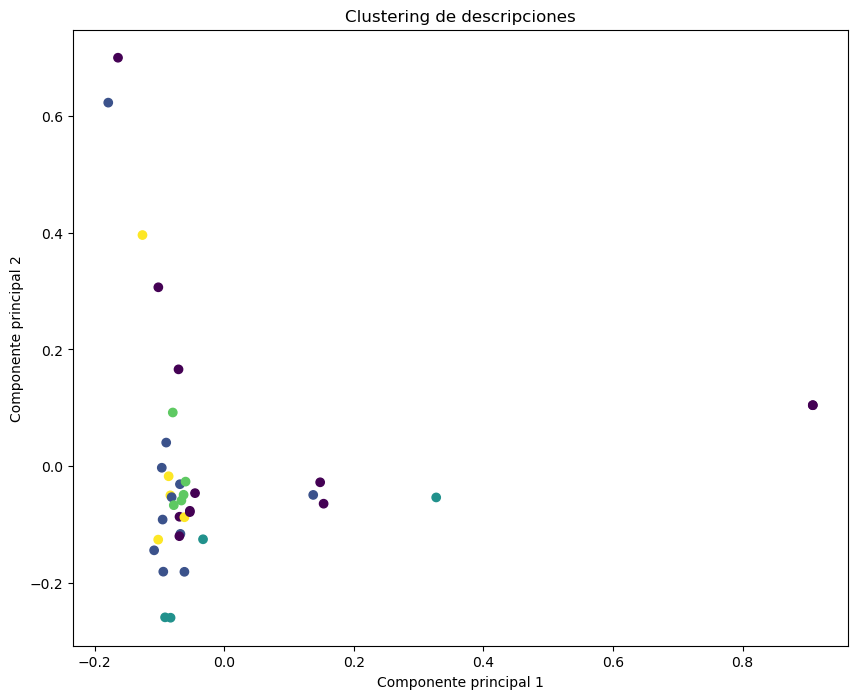

In [72]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Paso 1: Leer el archivo CSV
file_path ="C:/Users/oscarahe/OneDrive - Intel Corporation/Desktop/Exceles/EMRMARCH.csv"  # Reemplaza con la ruta de tu archivo
df = pd.read_csv(file_path)

#definir que columna para trabajar
column_work = 'Failure Description' #description or processed_text

# Paso 2: Limpiar los datos
# Eliminar filas con NaN en la columna "description"
df = df.dropna(subset=[column_work])

print(df.head())

# Paso 3: Preprocesar los textos
# Convertir los textos a minúsculas y eliminar caracteres especiales
df[column_work] = df[column_work].str.lower().str.replace('[^\w\s]', '', regex=True)

# Vectorizar los textos usando TF-IDF
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df[column_work])

# Paso 4: Aplicar el algoritmo de clustering
# Definir el número de clusters
num_clusters = 5  # Puedes ajustar este número según tus necesidades

# Crear el modelo KMeans
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
kmeans.fit(X)

# Agregar los labels de los clusters al DataFrame
df['cluster'] = kmeans.labels_

# Visualización opcional usando PCA para reducir la dimensionalidad
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X.toarray())

plt.figure(figsize=(10, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title('Clustering de descripciones')
plt.xlabel('Componente principal 1')
plt.ylabel('Componente principal 2')
#plt.savefig('/nfs/site/home/mhsantan/from_local/query2_clustering_output.png')
#plt.show()

# Mostrar los primeros resultados
#print(df.head())

# Otras formas de analizar el clustering

# 1. Palabras clave por cluster con número de apariciones
def get_top_keywords(data, clusters, labels, n_terms):
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()
    for i, r in df.iterrows():
        print(f'\nCluster {i}')
        top_terms = np.argsort(r)[-n_terms:]
        for t in top_terms:
            term = labels[t]
            count = (data[:, t].toarray() > 0).sum()
            print(f'{term} (apariciones: {count})')

# Mostrar las palabras clave más representativas de cada cluster
terms = vectorizer.get_feature_names_out()
get_top_keywords(X, kmeans.labels_, terms, 10)

# 2. Distribución de tamaños de los clusters
cluster_sizes = df['cluster'].value_counts()
print("\nDistribución de tamaños de los clusters:")
print(cluster_sizes)

# Mostrar los primeros resultados
print("\nPrimeros resultados del clustering:")
print(df.head())

In [73]:
df.to_csv("Manuel_FailureDescription.csv")

In [3]:
import pandas as pd
import numpy as np 
import seaborn as sns
from datetime import datetime
#from sklearn.model_selection import train_test_split
import sklearn as sl
import matplotlib.pyplot as plt
pd.set_option("display.max_columns",200)
datafeb=pd.read_csv('C:/Users/oscarahe/OneDrive - Intel Corporation/Desktop/Exceles/EMRMARCH.csv')
datafeb

,ID,Failure Description,Status,Theory,Conducted Tests
0,14018151333,The issue involves EMR systems throttling due ...,Rejected,Problem resolved after re-flashing the MAIN FP...,Initial tests with updated CPLD code and fixed...
1,14018509356,BIOS needs to change the mode to All2All when ...,Rejected,The issue was related to the BIOS configuratio...,The ticket was submitted and then rejected as ...
2,14019055430,Observing failing Rx JTOL results at 85C .92V ...,Rejected,Not a defect.,Converted to a low priority sighting since two...
3,14019247088,Observing completely closed eye once xtalk is ...,Rejected,Not a defect.,Adriana collected TYP & Fast units data withou...
4,15013435531,Regarding the XCC/MCC ES2 CPU PIROM size error...,Rejected,Merged.,The issue was merged with another ticket.
5,15013435860,EMR XCC/MCC ES2 CPU has PIROM size display iss...,Complete,The fuse was accidentally set using the decima...,Validation GAP between IVE and PAIV was identi...
6,14019978515,Found issue on a RB. Host CA Training Complex ...,Rejected,Not a defect.,The same error was found on two other hosts.
7,14019985093,From the A1 VV 100 Boot Training Repeatability...,Rejected,Not a defect.,The team agreed that despite the flat DFE resp...
8,14020175013,When tuning the EMR EPP settings for the impro...,Rejected,Tuning changes at this point in the project ne...,The decision was made to change the slope valu...
9,14020314810,The 'Active Idle Mode' violates the MAX_RATIO ...,Rejected,Resolution of MSR 620h unCore frequency limits...,The ticket was cloned from a server feature re...


In [2]:
import pynetbox

In [19]:
nb = pynetbox.api("https://netbox-server")
token = nb.create_token("oscarahe", "Blueoscar36.")
nb.token
'031f1ae1beccf46561c37dbe45c6dd8fdb6ef1e5'
from pprint import pprint
pprint(dict(token))
{'created': '2025-02-10 19:33:51',
 'description': '',
 'display': '6ef1e5 (oscarahe)',
 'expires': None,
 'id': 852,
 'key': '031f1ae1beccf46561c37dbe45c6dd8fdb6ef1e5',
 'url': 'https://netbox.habana-labs.com/user/api-tokens/852/',
 'user': {'display': 'oscarahe',
          'id': 852,
          'url': 'https://netbox.habana-labs.com/user/api-tokens/852/',
          'username': 'oscarahe'},
 'write_enabled': True}

SSLError: HTTPSConnectionPool(host='netbox-server', port=443): Max retries exceeded with url: /api/users/tokens/provision/ (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1007)')))

In [1]:
import pynetbox
nb = pynetbox.api(
        'https://netbox.habana-labs.com/',
        threading=True,
        token="b409db3a04647fda48228077306b10b561251bae")


In [2]:
device= nb.dcim.devices.get(name=hostname)

NameError: name 'hostname' is not defined

In [3]:
devices= nb.dcim.devices.all()
devices

In [4]:
devices = nb.dcim.devices.filter(device_type=['hls2','hls3'], tag='type-server',status='active')
for device in devices:
 print(device)

SSLError: HTTPSConnectionPool(host='netbox.habana-labs.com', port=443): Max retries exceeded with url: /api/dcim/devices/?device_type=hls2&device_type=hls3&tag=type-server&status=active&limit=0 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1007)')))

In [57]:
device= nb.dcim.devices.get(name="G3-BMC02-C03A-IDC")

SSLError: HTTPSConnectionPool(host='netbox.habana-labs.com', port=443): Max retries exceeded with url: /api/dcim/devices/?name=G3-BMC02-C03A-IDC&limit=0 (Caused by SSLError(SSLCertVerificationError(1, '[SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: self-signed certificate in certificate chain (_ssl.c:1007)')))

In [5]:
import pynetbox
nb = pynetbox.api(
        'https://netbox.habana-labs.com/',
        threading=True,
        token='b409db3a04647fda48228077306b10b561251bae')
nb.http_session.verify = False
device= nb.dcim.devices.get(name="G3-BMC02-C03A-IDC")
print(device)

C:\Users\oscarahe\AppData\Local\miniforge3\envs\jup_env\lib\site-packages\urllib3\connectionpool.py:1099: InsecureRequestWarning: Unverified HTTPS request is being made to host 'proxy-dmz.intel.com'. Adding certificate verification is strongly advised. See: https://urllib3.readthedocs.io/en/latest/advanced-usage.html#tls-warnings
  warnings.warn(


RequestError: The request failed with code 403 Forbidden but more specific details were not returned in json. Check the NetBox Logs or investigate this exception's error attribute.

In [51]:
import pandas as pd
import re

# Define the clean_text function
def clean_text(text):
    # Remove HTML tags
    emr_data = re.compile('<.*?>')
    text = re.sub(emr_data, '', text)
    
    # Remove special characters and extra spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove all non-word characters except spaces
    
    return text

# Read the CSV file into a DataFrame
emr_data =pd.read_csv('C:/Users/oscarahe/OneDrive - Intel Corporation/Desktop/Exceles/query2.csv')

# Apply the clean_text function to a specific column, e.g., 'column_name'
emr_data['new_description'] = emr_data['description'].apply(clean_text)

# Save the cleaned DataFrame back to a CSV file
#df.to_csv('cleaned_file.csv', index=False)


In [52]:
def find_pattern(df):
    match = re.search(r'nbsp', emr_data)
    if match:
        return match.group()
    else:
        return 'Pattern not found'

In [53]:
df['pattern'] = df['description'].apply(find_pattern)
df

TypeError: expected string or bytes-like object

In [14]:
emr_data.columns

Index(['id', 'rev', 'is_current', 'updated_date', 'system_updated_date',
       'read_grps', 'read_grps_id', 'subject', 'tenant', 'submitted_date',
       ...
       'local_updated_date',
       'sighting_central.sighting.sw_fw_fixability_estimate',
       'sighting_central.sighting.customer_visible',
       'sighting_central.sighting.impact',
       'sighting_central.sighting.bug_reason', 'collaborators', 'user_acl',
       'sighting_central.sighting.beat_escape_reason_details',
       'sighting_central.sighting.symptom', 'ww_local_updated_date'],
      dtype='object', length=333)

In [54]:
df["pattern"].value_counts()

pattern
nbsp                 321
Pattern not found     51
Name: count, dtype: int64

In [33]:
df=df["description"]
df

0      We booted 2 separate EMR systems 64C350W and 3...
1      BIOS needs to change Mode to All2All when CXL ...
2      Observing failing Rx JTOL results at 85C 92V w...
3      Observing completely closed eye once xtalk is ...
4      Regarding the XCCMCC ES2 CPU PIROM size error ...
                             ...                        
367     We read the contents on PIROM offset 3E4C but...
368    Translationlavaflash NVMe disk surprise hot pl...
369    Actual Behavior When CPUs are subscribed to CL...
370    Enable C6 MprimeCPUintelTranslation in English...
371    While running AMT observed 4 instances ofnbspE...
Name: description, Length: 372, dtype: object

In [47]:
man2=df.loc[df.str.contains("BIOS")]
man2
#m=man2.value_counts()
#m

1      BIOS needs to change Mode to All2All when CXL ...
6      Found issue on a RBHost FC01WVAW6001BIOS 104D5...
16     During EMR PO we found TOR timeouts and 3Strik...
17     ConfigQDF Q1CFBIOS EGSDCRB186B0092D11221031192...
20     Any writes to MSR0x1A4 and MSR 0x6D will cause...
                             ...                        
363    OIssue Description Fail Rate 100TDX module fai...
364    Actual Behavior span stylemsoasciifontfamilyCa...
365    nbspIssue nbspspan stylefontsize110ptfontfamil...
369    Actual Behavior When CPUs are subscribed to CL...
371    While running AMT observed 4 instances ofnbspE...
Name: description, Length: 109, dtype: object

In [45]:
import re

# Define words or phrases to search for
keywords = ["error", "failure", "memory leak", "system crash", "timeout","BIOS","Observing","EMR","nbsp","windowtext","the"]

# Create regex pattern (word boundaries ensure exact word matches)
pattern = r'\b(' + '|'.join(map(re.escape, keywords)) + r')\b'

# Filter rows where 'description' contains the keywords
df_filtered = df[df['description'].str.contains(pattern, regex=True, case=False, na=False)]

# Show the results
df_filtered


C:\Users\oscarahe\AppData\Local\Temp\ipykernel_18304\2623577972.py:10: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  df_filtered = df[df['description'].str.contains(pattern, regex=True, case=False, na=False)]


,id,rev,is_current,updated_date,system_updated_date,read_grps,read_grps_id,subject,tenant,submitted_date,locked_date,closed_date,eta,eta_request,sla_response_date,sla_resolution_date,sla_resolution_resume_date,sla_response_resume_date,sighting.open_date,sighting.root_caused_date,sighting.defined_date,sighting.fix_eta,sighting.fix_eta_2,sighting.fix_eta_3,permission_override,internal_state,link_order,is_synced,sla_custom_resolution_time,sighting.rank,sighting.is_prj_admin,sighting.days_debugging,sighting.days_validating,sighting.days_debug_level1,sighting.days_debug_level2,sighting.forum_level_min,sighting.days_waiting,sighting.days_to_root_caused,sla_resolution_time_remaining,parent_id,from_id,eid,native,link_type,lineage,origin_id,tran_id,concat_read_grps_id,concat_write_grps_id,source_read_grps_id,source_write_grps_id,write_grps_id,submitted_by,updated_by,locked_by,owner,from_tenant,closed_by,sync_action,nickname,priority,relationship,relationship_action,context,release,classification,component,reason,sla_response_met,sla_resolution_met,family,send_mail,kinship,link_direction,from_subject,from_release,clone_status,status,status_mapped_current,domain,sighting.conclusion,sighting.conclusion_mapped1,sighting.conclusion_mapped2,sighting.env_found,sighting.fix_status,sighting.forum,sighting.status_mode,sighting.team_found,sighting.merge_id,sighting.forum_level,sighting.errata_status,sighting.fix_category,sighting.fix_category_3,sighting.fix_lifetime,sighting.fix_status_3,sighting.fix_category_2,sighting.fix_type,sighting.fix_type_3,sighting.fix_status_2,sighting.fix_type_2,...,sighting_central.sighting.date_shipment_received,sighting_central.sighting.dpm,sighting_central.sighting.ppvm_bin,sighting_central.sighting.ppvm_bin_description,sighting_central.sighting.ppvs_bin,sighting_central.sighting.ppv_tp,sighting_central.sighting.ppvs_bin_description,sighting_central.sighting.class_tp,sighting_central.sighting.class_rv_results,sighting_central.sighting.unit_location,sighting_central.sighting.dpm_type,sighting_central.sighting.ce_support,sighting_central.sighting.ppv_rv_results,sighting_central.sighting.ww_decima,sighting_central.sighting.beat_classification,sighting_central.sighting.beat_common_test_plan,sighting_central.sighting.beat_when_expected,sighting_central.sighting.beat_who_should_have_found,sighting_central.sighting.beat_detection_complexity,sighting_central.sighting.beat_qe_required,sighting_central.sighting.days_awaiting_review,sighting_central.sighting.date_awaiting_review,sampletime,ww,ww_updated_date,ww_system_updated_date,ww_submitted_date,ww_locked_date,ww_closed_date,ww_eta,ww_eta_request,ww_sla_response_date,ww_sla_resolution_date,ww_sla_resolution_resume_date,ww_sla_response_resume_date,sighting.ww_open_date,sighting.ww_root_caused_date,sighting.ww_closed_aaron,sighting.ww_defined_date,sighting.ww_fix_eta,sighting.ww_fix_eta_2,sighting.ww_fix_eta_3,sighting_central.sighting.ww_date_open_new,sighting_central.sighting.ww_date_rootcause_validate,sighting_central.sighting.ww_date_assigned,sighting_central.sighting.ww_preventive_action_eta,sighting_central.sighting.ww_date_shipment_received,sighting_central.sighting.ww_date_awaiting_review,sighting_central.sighting.beat_other_test_plan,sighting_central.sighting.sysdbg_notes1,sighting_central.sighting.sysdbg_notes2,sighting_central.sighting.sysdbg_agenda,sighting_central.sighting.sysdbg_tag,sighting_central.sighting.fix_stepping,sighting_central.sighting.dram_die_width,sighting_central.sighting.dram_rank,sighting_central.sighting.dimm_type,sighting_central.sighting.dram_vendor,sighting_central.sighting.package_die_stack,sighting_central.sighting.dram_die_density,sighting_central.sighting.dram_package_densitycapacity,sighting_central.sighting.days_awaiting_3rd_party,sighting_central.sighting.days_awaiting_user,sighting_central.sighting.sysdbg_name1,sighting_central.sighting.sysdbg_name3,sighting_central.sighting.awaiting_who,sighting_central.sighting.sysdbg_int2,sightin

In [48]:
df_matches = df['description'].str.extractall(pattern)
df_matches


0
    match           
0   0            EMR
    1            the
    2            the
1   0           BIOS
2   0      Observing
...              ...
371 24           the
    25           the
    26          BIOS
    27          nbsp
    28          nbsp

[14323 rows x 1 columns]

In [49]:
df['keyword_found'] = df['description'].str.findall(pattern)  # Find all occurrences
df['keyword_found'].explode().value_counts()  # Count occurrences


keyword_found
nbsp          10351
windowtext     1797
the            1516
error           261
EMR             175
BIOS             98
failure          98
timeout          20
Observing         7
Name: count, dtype: int64

In [2]:
from collections import Counter
import itertools
import nltk
import pandas as pd

# Load the CSV file
file_path = "C:/Users/oscarahe/OneDrive - Intel Corporation/Desktop/Exceles/newcsv.csv"

df = pd.read_csv(file_path)

# Ensure NLTK's tokenizer is available
nltk.download('punkt')

# Drop NaN values and convert descriptions to lowercase
descriptions = df['cleaned_description'].dropna().str.lower()

# Tokenize words and filter out very short words (e.g., single letters)
word_lists = descriptions.apply(nltk.word_tokenize)
all_words = list(itertools.chain(*word_lists))
filtered_words = [word for word in all_words if len(word) > 2]  # Remove very short words

# Count word frequencies
word_counts = Counter(filtered_words)
common_words = word_counts.most_common(30)  # Get top 50 words

# Extract frequent two-word and three-word phrases (n-grams)
bigrams = list(itertools.chain(*[list(nltk.bigrams(words)) for words in word_lists]))
trigrams = list(itertools.chain(*[list(nltk.trigrams(words)) for words in word_lists]))

bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

common_bigrams = bigram_counts # Top 30 bigrams
common_trigrams = trigram_counts  # Top 30 trigrams

# Print results
print("Top 50 common words:", common_words)
print("Top 30 bigrams:", common_bigrams)
print("Top 30 trigrams:", common_trigrams)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Top 50 common words: [('nbsp', 10351), ('windowtext', 1797), ('the', 1616), ('4pt', 1362), ('54pt', 958), ('10pt', 820), ('0in', 772), ('nbspnbsp', 679), ('and', 544), ('10ptborderrightsolid', 540), ('styleborderstylesolidbordercolora3a3a3borderwidth1pt', 454), ('error', 443), ('nowrap', 436), ('for', 430), ('with', 417), ('2023', 371), ('padding0in', 343), ('this', 288), ('not', 285), ('that', 279), ('valignbottom', 273), ('borderbottomsolid', 265), ('valigntop', 220), ('fl31ca105bs0312', 220), ('test', 215), ('mce', 214), ('when', 208), ('set', 204), ('call', 203), ('are', 199)]
Top 30 bigrams: Counter({('nbsp', 'nbsp'): 7725, ('4pt', '4pt'): 908, ('54pt', '0in'): 723, ('windowtext', '10pt'): 688, ('td', 'styleborderstylesolidbordercolora3a3a3borderwidth1pt'): 454, ('windowtext', '10ptborderrightsolid'): 439, ('10ptborderrightsolid', 'windowtext'): 433, ('padding0in', '54pt'): 343, ('nbspnbsp', 'nbsp'): 314, ('10pt', 'padding0in'): 244, ('nowrap', 'valignbottom'): 229, ('0in', '54pt'

IOPub data rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_data_rate_limit`.

Current values:
ServerApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
ServerApp.rate_limit_window=3.0 (secs)



In [3]:
import pandas as pd

# Convert common words to a DataFrame
df_words = pd.DataFrame(common_words, columns=['Word', 'Count'])

# Convert bigrams to a DataFrame
df_bigrams = pd.DataFrame(common_bigrams, columns=['Bigram', 'Count'])
df_bigrams['Bigram'] = df_bigrams['Bigram'].apply(lambda x: ' '.join(x))  # Convert tuple to string

# Convert trigrams to a DataFrame
df_trigrams = pd.DataFrame(common_trigrams, columns=['Trigram', 'Count'])
df_trigrams['Trigram'] = df_trigrams['Trigram'].apply(lambda x: ' '.join(x))  # Convert tuple to string

# Display the DataFrames
print(df_words)    # Top words
print(df_bigrams)  # Top bigrams
print(df_trigrams) # Top trigrams


                                                 Word  Count
0                                                nbsp  10351
1                                          windowtext   1797
2                                                 the   1616
3                                                 4pt   1362
4                                                54pt    958
5                                                10pt    820
6                                                 0in    772
7                                            nbspnbsp    679
8                                                 and    544
9                                10ptborderrightsolid    540
10  styleborderstylesolidbordercolora3a3a3borderwi...    454
11                                              error    443
12                                             nowrap    436
13                                                for    430
14                                               with    417
15                      

In [4]:
common_words

[('nbsp', 10351),
 ('windowtext', 1797),
 ('the', 1616),
 ('4pt', 1362),
 ('54pt', 958),
 ('10pt', 820),
 ('0in', 772),
 ('nbspnbsp', 679),
 ('and', 544),
 ('10ptborderrightsolid', 540),
 ('styleborderstylesolidbordercolora3a3a3borderwidth1pt', 454),
 ('error', 443),
 ('nowrap', 436),
 ('for', 430),
 ('with', 417),
 ('2023', 371),
 ('padding0in', 343),
 ('this', 288),
 ('not', 285),
 ('that', 279),
 ('valignbottom', 273),
 ('borderbottomsolid', 265),
 ('valigntop', 220),
 ('fl31ca105bs0312', 220),
 ('test', 215),
 ('mce', 214),
 ('when', 208),
 ('set', 204),
 ('call', 203),
 ('are', 199)]

In [6]:
common_bigrams

Counter({('nbsp', 'nbsp'): 7725,
         ('4pt', '4pt'): 908,
         ('54pt', '0in'): 723,
         ('windowtext', '10pt'): 688,
         ('td', 'styleborderstylesolidbordercolora3a3a3borderwidth1pt'): 454,
         ('windowtext', '10ptborderrightsolid'): 439,
         ('10ptborderrightsolid', 'windowtext'): 433,
         ('padding0in', '54pt'): 343,
         ('nbspnbsp', 'nbsp'): 314,
         ('10pt', 'padding0in'): 244,
         ('nowrap', 'valignbottom'): 229,
         ('0in', '54pt'): 197,
         ('borderbottomsolid', 'windowtext'): 196,
         ('0in', '54ptheight2in'): 195,
         ('ghz', 'asserted'): 192,
         ('asserted', 'by'): 192,
         ('by', 'call'): 192,
         ('call', 'to'): 192,
         ('28', '2023'): 182,
         ('windowtext', '5pt'): 177,
         ('to', 'kernelnbsp280'): 177,
         ('kernelnbsp280', 'ghz'): 177,
         ('nbsp', 'nbspnbsp'): 171,
         ('borderleftnoneborderbottomsolid', 'windowtext'): 149,
         ('fl31ca105bs0312', '

In [5]:
common_trigrams

Counter({('nbsp', 'nbsp', 'nbsp'): 6269,
         ('4pt', '4pt', '4pt'): 454,
         ('10ptborderrightsolid', 'windowtext', '10pt'): 430,
         ('windowtext', '10ptborderrightsolid', 'windowtext'): 428,
         ('padding0in', '54pt', '0in'): 343,
         ('10pt', 'padding0in', '54pt'): 244,
         ('54pt', '0in', '54ptheight2in'): 195,
         ('ghz', 'asserted', 'by'): 192,
         ('asserted', 'by', 'call'): 192,
         ('by', 'call', 'to'): 192,
         ('borderbottomsolid', 'windowtext', '10ptborderrightsolid'): 189,
         ('call', 'to', 'kernelnbsp280'): 177,
         ('to', 'kernelnbsp280', 'ghz'): 177,
         ('kernelnbsp280', 'ghz', 'asserted'): 177,
         ('windowtext', '10pt', 'padding0in'): 171,
         ('nbsp', 'nbspnbsp', 'nbsp'): 164,
         ('nbspnbsp', 'nbsp', 'nbsp'): 151,
         ('54pt', '0in', '54pt'): 149,
         ('borderleftnoneborderbottomsolid',
          'windowtext',
          '10ptborderrightsolid'): 149,
         ('windowtext', '5

In [126]:

import re

# List of unwanted words (from your results)
unwanted_words = [
    "nbsp", "windowtext", "4pt", "54pt", "10pt", "0in", "nbspnbsp", "and",
    "10ptborderrightsolid", "styleborderstylesolidbordercolor", "error", "nowrap",
    "padding0in","borderbottomsolid","valigntop","10ptborderrightsolid10ptborderrightsolid"
    "styleborderstylesolidbordercolora3a3a3borderwi.","10ptborderrightsolid","mce",
    "borderleftnoneborderbottomsolid windowtext","call to kernelnbsp280","4pt 4pt",
    "borderbottomsolid","54ptheight2in","5pt","kernelnbsp280","5ptmsoborderrightaltsolid5ptmsoborderrightaltsolid",
    "nbsp000nbsp","noneborderbottomsolid","nbspnbspnbsp","borderleftnoneborderbottomsolid","0nbspnbspnbspnbspnbsp",
    "nbspnbspnbspnbsp","54ptheight2in","d0d7e5","ameifunbspnbspnbspnbspnbspnbspnbsp","0nbsp",
    "noneborderbottomsolid","5ptmsoborderrightaltsolid","54ptheight150pt","2121resultnbsp",
    "0x00000001","bspnbspnbspnbspnbspnbspnbsp","backgroundb4c6e7padding0in","stylemargin0infontfamilyintelclearregularfontsize100pt",
    "stylemarginbottom0intextaligncenter","padding75pt","54ptheight15225pt","54ptheight1830pt","54ptheight1065pt",
    "454545nbsp","0329errornbsp""nbspcpu0nbsp","nbspcpu1nbsp","backgroundcolor4472c4verticalaligntopwidth6868inpadding4pt",
    "10000","10000nbsp","current","name","x","2052resultnbsp","errornbsp","r008s011zp31l10b01",
    "reproduce","stylefontsize110ptfontfamilyquotcalibriquotsansserif","borderleftnonemsobordertopaltsolid",
    "m2s","nodemanager4n9ll","emr_xcca0_pln_exc_piv_emrpo_eballest","egsdcrb1e9i0092d162211141020","0xf1480193",
    'r013s001fl30lne001',"oknbsp","borderleftnonebackground0070c0padding75pt","rmt","2046resultnbsp",
    "5238","5858","5959","6060","6161","6363","skt","0000000000000000","return","nbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbspnbsp",
    "nbsp", "windowtext", "4pt", "54pt", "10pt", "0in", "nbspnbsp", "and", "td",
    "to", "is", "10ptborderrightsolid", "in", "of", "styleborderstylesolidbordercolor",
    "error", "nowrap", "on", "for", "with", "a", "padding0in", "by", "this",
    "not", "that", "valignbottom", "0", "borderbottomsolid", "p", "valigntop",
    "fl31ca105bs0312", "test", "mce", "we", "when", "set", "call", "are",
    "asserted", "ghz", "system", "was", "as", "5pt", "kernelnbsp280", "emr",
    "be", "from", "has", "new", "memory", "issue", "socket", "bios", "value",
    "check", "cpu", "state", "expected", "machine", "failed", "hardware",
    "boot", "found", "timeout", "failures", "crash", "failure", "reset",
    "hang", "warning", "detected", "errornbsp", "failing", "power", "idle",
    "configuration", "status", "detected", "device", "debug", "processor",
    "performance", "timeout", "failure", "warning", "error0x00000000","socket00",
    "mc_status","bank00","nameifunbspnbspnbspnbspnbspnbspnbsp","code","0x0nbspnbspnbsp","time",
    "0606","0802","1701error","40pt","2121resultnbsp","ank00 nameifunbspnbspnbspnbspnbspnbspnbsp soc",
    "gt mc_status 0x0nbspnbspnbsp","mc_status 0x0nbspnbspnbsp bank00","0x0nbspnbspnbsp bank00 nameifunbspnbspnbspnbsp",
    "thread00nbspnbsp gt mc_status","thread01nbspnbsp gt mc_status","width137 stylewidth1030ptbordertopnoneborderle",
    "stylewidth1030ptbordertopnoneborderleftnone ba","msobordertopaltsolid 5ptmsoborderleftaltsolid","width63 stylewidth470ptbordertopnoneborderleft",
    "stylewidth470ptbordertopnoneborderleftnone d0d","nov 15 2022","nov 16 2022","5ptmsoborderleftaltsolid msoborderaltsolid 5pt",
    "linear time granularity","paivmixervf7sxjun 22 2023","40pt 40pt 40pt","d0d7e5 d0d7e5 54ptheight1275pt",
    "2121resultnbsp nbsp0129 2121resultnbsp","msoborderbottomaltsolid classmsonormal alignce","nbsp0x0nbsp 0x0nbsp nbsp0nbsp",
    "highfsweepjan 16 2023","styleborderstylesolidbordercolora3a3a3borderwi","1 if the","a3a3a3 padding40pt 40pt",
     "padding40pt 40pt 40pt","the","1616",'styleborderstylesolidbordercolora3a3a3borderwidth1pt','1','2023','ghz',
    '28','gt','error','emr','at','16''mce','d0d7e5','new','1nbsp','it','if','2022','nov','or','core','socket00','mc_status',
    'bank00','nameifunbspnbspnbspnbspnbspnbspnbsp','no','code','0x0nbspnbspnbsp','time','bios','span','t0','rcu',
    'smimcahandler','but','msoborderbottomaltsolid','r006s018zp31l10b01','same','using','classmsonormal','system','test',
    'data','running','after','an','all','msofareastfontfamilycalibrimsofareastthemefontminorlatinmsoansilanguage','bordertopnonebackground4472c4padding0in',
    'backgrounddeeaf6padding0in','nbspnbspnbspnbspnbspnbspnbspnbsp','msobordertopaltsolid','machine','thread00nbspnbsp','a3a3a3','nbsp0129','thread01nbspnbsp',
    'stylewidth1030ptbordertopnoneborderleftnon','styleborderstylesolidbordercolorA3A3A3borderwidth1pt','ghz','75pt','aligncenter',
      'width105','<p>',"< ","<>While","<>"]


df = pd.DataFrame(datafeb)

# Create regex pattern to match entire words
pattern = r'(?<!\w)(' + '|'.join(map(re.escape, unwanted_words)) + r')(?!\w)'

# Remove these words from 'description' column
datafeb['description2'] = datafeb['cleaned_description'].str.replace(pattern, '', regex=True)

# Remove extra spaces that might be left
datafeb['description2'] = datafeb['cleaned_description'].str.replace(r'\s+', ' ', regex=True).str.strip()

# Display sample results
print(datafeb[['description','cleaned_description']])

#df.to_csv("cleaned4.csv")


                                           description  \
0    <p>We booted 2 separate EMR systems (64C350W a...   
1    <span style="font-size: 12.18px;">BIOS needs t...   
2    <p>Observing failing Rx JTOL results at 85C .9...   
3    <div>Observing completely closed eye once xtal...   
4    <p><span style="font-size: 16px;">Regarding th...   
..                                                 ...   
465  <p><span style="font-size: 12px; color: inheri...   
466                                                NaN   
467  <p class="MsoNormal"><span lang="EN-US"><b>Act...   
468  <p>Enable C6??????????? ?Mprime???????????????...   
469  <p>While running AMT, observed 4 instances of&...   

                                   cleaned_description  
0    <>We booted 2 separate EMR systems (64C350W 38...  
1    < style="font-size: 12.18px;">BIOS needs chang...  
2    <>Observing Rx JTOL results 85C .92V xtalk ena...  
3    <div>Observing completely closed eye once xtal...  
4    < style="font

In [62]:
# Define the clean_text function
def clean_text(text):
    # Remove HTML tags
    df = re.compile('<.*?>')
    text = re.sub(df, '', text)
    
    # Remove special characters and extra spaces
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    text = re.sub(r'[^\w\s]', '', text)  # Remove all non-word characters except spaces
    
    return text

# Read the CSV file into a DataFrame
#emr_data =pd.read_csv('C:/Users/oscarahe/OneDrive - Intel Corporation/Desktop/Exceles/query2.csv')

# Apply the clean_text function to a specific column, e.g., 'column_name'
df['cleaned_description'] = df['description'].apply(clean_text)

new=print(df[['id','description','cleaned_description']])

df.to_csv("cleanedfeb.csv")
# Save the cleaned DataFrame back to a CSV file
#df.to_csv('cleaned_file.csv', index=False)

              id                                        description  \
0    14018151333  <p>We booted 2 separate EMR systems (64C350W a...   
1    14018509356  <span style="font-size: 12.18px;">BIOS needs t...   
2    14019055430  <p>Observing failing Rx JTOL results at 85C .9...   
3    14019247088  <div>Observing completely closed eye once xtal...   
4    15013435531  <p><span style="font-size: 16px;">Regarding th...   
..           ...                                                ...   
367  15014600103  <p>\n We read the contents on PIROM offset 3E-...   
368  15014729895  <p><span style="font-size: 12px; color: inheri...   
369  16022750062  <p class="MsoNormal"><span lang="EN-US"><b>Act...   
370  15014843377  <p>Enable C6??????????? ?Mprime???????????????...   
371  15015659425  <p>While running AMT, observed 4 instances of&...   

                                   cleaned_description  
0    We booted 2 separate EMR systems 64C350W and 3...  
1    BIOS needs to change Mode to

In [87]:
new

In [83]:
# Function to generate n-grams
def generate_ngrams(word_lists, n):
    return list(itertools.chain(*[list(nltk.ngrams(words, n)) for words in word_lists]))

# Example: Generate 4-grams
fourgrams = generate_ngrams(word_lists, 1)
fourgram_counts = Counter(fourgrams)
common_fourgrams = fourgram_counts.most_common(30)

# Print results for 4-grams
print("Top 30 fourgrams:", common_fourgrams)


Top 30 fourgrams: [(('styleborderstylesolidbordercolora3a3a3borderwidth1pt',), 328), (('ghz',), 194), (('emr',), 154), (('d0d7e5',), 151), (('mce',), 148), (('socket00',), 122), (('mc_status',), 121), (('bank00',), 121), (('nameifunbspnbspnbspnbspnbspnbspnbsp',), 121), (('new',), 112), (('1701error',), 107), (('nov',), 97), (('error',), 96), (('smimcahandler',), 95), (('classmsonormal',), 90), (('width137',), 87), (('54ptheight210pt',), 86), (('t0',), 85), (('bios',), 84), (('0707errornbsp',), 81), (('1258errornbsp',), 80), (('width64',), 77), (('15',), 75), (('2',), 74), (('stylewidth480ptbordertopnone',), 70), (('backgroundb4c6e7padding0in',), 68), (('75pt',), 68), (('os',), 67), (('t1',), 67), (('aligncenter',), 66)]


In [35]:
bigram_counts

Counter({('ghz', 'ghz'): 177,
         ('bank00', 'nameifunbspnbspnbspnbspnbspnbspnbsp'): 121,
         ('nameifunbspnbspnbspnbspnbspnbspnbsp', 'socket00'): 119,
         ('mc_status', 'bank00'): 119,
         ('d0d7e5', 'd0d7e5'): 72,
         ('width64', 'stylewidth480ptbordertopnone'): 70,
         ('backgroundb4c6e7padding0in', '54ptheight210pt'): 68,
         ('t1', 'mce'): 67,
         ('t0', 'mce'): 66,
         ('classmsonormal', 'aligncenter'): 65,
         ('thread00nbspnbsp', 'mc_status'): 60,
         ('thread01nbspnbsp', 'mc_status'): 59,
         ('width137', 'stylewidth1030ptbordertopnoneborderleftnone'): 55,
         ('stylewidth1030ptbordertopnoneborderleftnone',
          'backgroundb4c6e7padding0in'): 55,
         ('smimcahandler', 'entrynbsps1'): 53,
         ('width63', 'stylewidth470ptbordertopnoneborderleftnone'): 51,
         ('stylewidth470ptbordertopnoneborderleftnone', 'd0d7e5'): 51,
         ('nov', '15'): 48,
         ('msoborderaltsolid', '5ptpadding0in'):

In [29]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download stopwords and punkt if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

def process_by_word_frequency(datafeb):
    # Set of stopwords
    stop_words = set(stopwords.words('english'))
    
    # Tokenize titles and remove stopwords
    datafeb['title_tokens'] = datafeb['cleaned_description'].apply(lambda cleaned_description: [
        word for word in word_tokenize(cleaned_description if word.isalnum() and word not in stop_words
    ])
    
    # Flatten the list of all words in the 'title' column to compute frequencies
    all_words = [word for tokens in datafeb['cleaned_description'] for word in tokens]
    
    # Compute word frequency distribution
    freq_dist = FreqDist(all_words)
    
    # Assign the most frequent words in each title to a new column
    datafeb['frequent_words'] = datafeb['title_tokens'].apply(lambda tokens: [
        word for word in tokens if freq_dist[word] >= 1  # Threshold of 1, you can adjust
    ])
    
    return datafeb

# Apply the function to your dataset
data = process_by_word_frequency(datafeb)

# Show the results
data=datafeb[['description','frequent_words']].head(20)
data


SyntaxError: closing parenthesis ']' does not match opening parenthesis '(' on line 16 (245623745.py, line 17)

In [4]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')



# Initialize NLTK components
stop_words = set(stopwords.words('english'))
ps = PorterStemmer()

# Define text processing functions
def preprocess_text(text):
    if not isinstance(text, str):
        return []  # Return an empty list if the input is not a string
        
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stopwords
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Apply stemming
    tokens = [ps.stem(word) for word in tokens]
    
    return tokens

# Apply the text processing function to the desired column
# Replace 'text_column' with the name of your column containing text data
datafeb['processed_text'] = datafeb['Conducted Tests'].apply(preprocess_text)

# Display the DataFrame
d=datafeb[['ID','Conducted Tests','processed_text']]
d

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,ID,Conducted Tests,processed_text
0,14018151333,Initial tests with updated CPLD code and fixed...,"[initi, test, updat, cpld, code, fix, strap, s..."
1,14018509356,The ticket was submitted and then rejected as ...,"[ticket, submit, reject, file, wrong, databas,..."
2,14019055430,Converted to a low priority sighting since two...,"[convert, low, prioriti, sight, sinc, two, dif..."
3,14019247088,Adriana collected TYP & Fast units data withou...,"[adriana, collect, typ, &, fast, unit, data, w..."
4,15013435531,The issue was merged with another ticket.,"[issu, merg, anoth, ticket, .]"
5,15013435860,Validation GAP between IVE and PAIV was identi...,"[valid, gap, ive, paiv, identifi, ,, prevent, ..."
6,14019978515,The same error was found on two other hosts.,"[error, found, two, host, .]"
7,14019985093,The team agreed that despite the flat DFE resp...,"[team, agre, despit, flat, dfe, respons, behav..."
8,14020175013,The decision was made to change the slope valu...,"[decis, made, chang, slope, valu, 0, core, fre..."
9,14020314810,The ticket was cloned from a server feature re...,"[ticket, clone, server, featur, request, initi..."


In [13]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
 #Convert the list of tokens back to a single string
d['descriptionn'] = d['processed_text'].apply(lambda tokens: ' '.join(tokens))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(d['processed_text'])

tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=tfidf_vectorizer.get_feature_names_out())

print("\nTF-IDF DataFrame:")
print(tfidf_df.head())




C:\Users\oscarahe\AppData\Local\Temp\ipykernel_9684\2370329010.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['descriptionn'] = d['processed_text'].apply(lambda tokens: ' '.join(tokens))


AttributeError: 'list' object has no attribute 'lower'

In [14]:
import pandas as pd
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from sklearn.feature_extraction.text import TfidfVectorizer

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Sample data (replace this with your actual data)


def process_by_word_frequency(d):
    # Set of stopwords
    stop_words = set(stopwords.words('english'))
    
    # Tokenize descriptions and remove stopwords
    d['title_tokens'] = d['processed_text'].apply(lambda processed_text: [
        word for word in word_tokenize(str(processed_text).lower()) if word.isalnum() and word not in stop_words
    ])
    
    # Flatten the list of all words in the 'title_tokens' column to compute frequencies
    all_words = [word for tokens in datafeb['title_tokens'] for word in tokens]
    
    # Compute word frequency distribution
    freq_dist = FreqDist(all_words)
    
    # Assign the most frequent words in each description to a new column
    d['frequent_words'] = d['title_tokens'].apply(lambda tokens: [
        word for word in tokens if freq_dist[word] >= 5  # Threshold of 5, you can adjust
    ])
    
    return d

# Apply the function to your dataset
d = process_by_word_frequency(d)

# Prepare text data for vectorization
d['processed_text'] = d['title_tokens'].apply(lambda tokens: ' '.join(tokens))

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(d['processed_text'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF vectors
print(tfidf_df)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
C:\Users\oscarahe\AppData\Local\Temp\ipykernel_9684\801975919.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['title_tokens'] = d['processed_text'].apply(lambda processed_text: [


KeyError: 'title_tokens'

In [47]:
# Apply preprocessing
emr_data['process'] = data['frequent_words'].apply(process_by_word_frequency)

# Vectorize using TF-IDF
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(emr_data['frequent_words'])

# Convert to DataFrame for better visualization
tfidf_df = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())

# Display the TF-IDF vectors
print(tfidf_df)



TypeError: list indices must be integers or slices, not str

In [93]:
datafeb

,Unnamed: 0,id,rev,is_current,updated_date,system_updated_date,read_grps,read_grps_id,subject,tenant,submitted_date,locked_date,closed_date,eta,eta_request,sla_response_date,sla_resolution_date,sla_resolution_resume_date,sla_response_resume_date,sighting.open_date,sighting.root_caused_date,sighting.defined_date,sighting.fix_eta,sighting.fix_eta_2,sighting.fix_eta_3,permission_override,internal_state,link_order,is_synced,sla_custom_resolution_time,sighting.rank,sighting.is_prj_admin,sighting.days_debugging,sighting.days_validating,sighting.days_debug_level1,sighting.days_debug_level2,sighting.forum_level_min,sighting.days_waiting,sighting.days_to_root_caused,sla_resolution_time_remaining,parent_id,from_id,eid,native,link_type,lineage,origin_id,tran_id,concat_read_grps_id,concat_write_grps_id,source_read_grps_id,source_write_grps_id,write_grps_id,submitted_by,updated_by,locked_by,owner,from_tenant,closed_by,sync_action,nickname,priority,relationship,relationship_action,context,release,classification,component,reason,sla_response_met,sla_resolution_met,family,send_mail,kinship,link_direction,from_subject,from_release,clone_status,status,status_mapped_current,domain,sighting.conclusion,sighting.conclusion_mapped1,sighting.conclusion_mapped2,sighting.env_found,sighting.fix_status,sighting.forum,sighting.status_mode,sighting.team_found,sighting.merge_id,sighting.forum_level,sighting.errata_status,sighting.fix_category,sighting.fix_category_3,sighting.fix_lifetime,sighting.fix_status_3,sighting.fix_category_2,sighting.fix_type,sighting.fix_type_3,sighting.fix_status_2,...,sighting_central.sighting.ppvm_bin,sighting_central.sighting.ppvm_bin_description,sighting_central.sighting.ppvs_bin,sighting_central.sighting.ppv_tp,sighting_central.sighting.ppvs_bin_description,sighting_central.sighting.class_tp,sighting_central.sighting.class_rv_results,sighting_central.sighting.unit_location,sighting_central.sighting.dpm_type,sighting_central.sighting.ce_support,sighting_central.sighting.ppv_rv_results,sighting_central.sighting.ww_decima,sighting_central.sighting.beat_classification,sighting_central.sighting.beat_common_test_plan,sighting_central.sighting.beat_when_expected,sighting_central.sighting.beat_who_should_have_found,sighting_central.sighting.beat_detection_complexity,sighting_central.sighting.beat_qe_required,sighting_central.sighting.days_awaiting_review,sighting_central.sighting.date_awaiting_review,sampletime,ww,ww_updated_date,ww_system_updated_date,ww_submitted_date,ww_locked_date,ww_closed_date,ww_eta,ww_eta_request,ww_sla_response_date,ww_sla_resolution_date,ww_sla_resolution_resume_date,ww_sla_response_resume_date,sighting.ww_open_date,sighting.ww_root_caused_date,sighting.ww_closed_aaron,sighting.ww_defined_date,sighting.ww_fix_eta,sighting.ww_fix_eta_2,sighting.ww_fix_eta_3,sighting_central.sighting.ww_date_open_new,sighting_central.sighting.ww_date_rootcause_validate,sighting_central.sighting.ww_date_assigned,sighting_central.sighting.ww_preventive_action_eta,sighting_central.sighting.ww_date_shipment_received,sighting_central.sighting.ww_date_awaiting_review,sighting_central.sighting.beat_other_test_plan,sighting_central.sighting.sysdbg_notes1,sighting_central.sighting.sysdbg_notes2,sighting_central.sighting.sysdbg_agenda,sighting_central.sighting.sysdbg_tag,sighting_central.sighting.fix_stepping,sighting_central.sighting.dram_die_width,sighting_central.sighting.dram_rank,sighting_central.sighting.dimm_type,sighting_central.sighting.dram_vendor,sighting_central.sighting.package_die_stack,sighting_central.sighting.dram_die_density,sighting_central.sighting.dram_package_densitycapacity,sighting_central.sighting.days_awaiting_3rd_party,sighting_central.sighting.days_awaiting_user,sighting_central.sighting.sysdbg_name1,sighting_central.sighting.sysdbg_name3,sighting_central.sighting.awaiting_who,sighting_central.sighting.sysdbg_int2,sighting_central.sighting.sysdbg_int1,sighting_central.sighting.attention_needed,sighting_centr

In [84]:
raw_text = "<p>This is a <b>sample</b> text with <a href='#'>HTML</a> tags!</p>"
cleaned_text = clean_text(raw_text)
print(cleaned_text)

This is a sample text with HTML tags


In [82]:
emr_data_descriptionremove=clean_text(text)
emr_data_descriptionremove

NameError: name 'text' is not defined

In [71]:
emr_data_descriptionremove[['description']]

,description
0,False
1,True
2,False
3,True
4,True
...,...
367,False
368,True
369,True
370,False


In [64]:
import re

def clean_text(text):
    # Remove HTML tags
    emr_data = re.compile('<.*?>')
    text = re.sub(emr_data, '', text)
    
    # Remove special characters and extra spaces
    text = re.sub(r'\s+', ' ', text)
    text = re.sub(r'[^\w\s]', '', text)
    
    return text

def extract_information(text):
    # Example: Extract sections based on keywords
    sections = {}
    keywords = ['EMR Systems', 'Technical Details', 'Errors and Testing', 'BIOS and Configuration Issues']
    
    for keyword in keywords:
        pattern = rf'{keyword}:(.*?)\n\n'
        match = re.search(pattern, text, re.DOTALL)
        if match:
            sections[keyword] = match.group(1).strip()
    
    return sections

def main():
    # Read the data from a file or a string
    with open('query2.csv', 'r') as file:
        data = file.read()
    
    # Clean the text
    cleaned_data = clean_text(data)
    
    # Extract relevant information
    info = extract_information(cleaned_data)
    
# Write the cleaned and organized data to a new file
    with open('cleaned_output.csv', 'w') as output_file:
        for section, content in info.items():
            output_file.write(f"{section}:\n{content}\n\n")

if __name__ == "__main__":
    main()

##  1. CLEANNING PROCESS/EXPLORATORY ANALYSIS


In [2]:
emr_data.columns

Index(['id', 'rev', 'is_current', 'updated_date', 'system_updated_date',
       'read_grps', 'read_grps_id', 'subject', 'tenant', 'submitted_date',
       ...
       'local_updated_date',
       'sighting_central.sighting.sw_fw_fixability_estimate',
       'sighting_central.sighting.customer_visible',
       'sighting_central.sighting.impact',
       'sighting_central.sighting.bug_reason', 'collaborators', 'user_acl',
       'sighting_central.sighting.beat_escape_reason_details',
       'sighting_central.sighting.symptom', 'ww_local_updated_date'],
      dtype='object', length=333)

In [23]:
emr_data[['description']]

,description
0,<p>We booted 2 separate EMR systems (64C350W a...
1,"<span style=""font-size: 12.18px;"">BIOS needs t..."
2,<p>Observing failing Rx JTOL results at 85C .9...
3,<div>Observing completely closed eye once xtal...
4,"<p><span style=""font-size: 16px;"">Regarding th..."
...,...
367,<p>\n We read the contents on PIROM offset 3E-...
368,"<p><span style=""font-size: 12px; color: inheri..."
369,"<p class=""MsoNormal""><span lang=""EN-US""><b>Act..."
370,<p>Enable C6??????????? ?Mprime???????????????...


In [62]:
def tweak_hw(emr_data):
    return (emr_data
            
           .assign(description=lambda df_: df_.description.str.replace("<p>",""))
           .assign(description=lambda df_: df_.description.str.replace("<div>",""))
            .assign(description=lambda df_: df_.description.str.replace("<p",""))
            .assign(description=lambda df_: df_.description.str.replace("<>",""))
            .assign(description=lambda df_: df_.description.str.replace("<",""))
            .assign(description=lambda df_: df_.description.str.replace(">",""))
            .assign(description=lambda df_: df_.description.str.replace("\n ",""))
            .assign(description=lambda df_: df_.description.str.replace("</p><p><br /></p><p>",""))
            .assign(description=lambda df_: df_.description.str.contains("style",""))
            .assign(description=lambda df_: df_.description.str.contains("stylewidth470ptbordertopnoneborderleft",""))
                  )
           
           


In [63]:
emr_data_description=tweak_hw(emr_data)
emr_data_description

AttributeError: Can only use .str accessor with string values!

In [64]:
import pandas as pd
import re

# Sample DataFrame (Replace with your actual dataset)
data = {
    'description': [
        "This is a sample text with some unwanted words",
        "The quick brown fox jumps over the lazy dog",
        "Data cleaning is essential for machine learning",
        "stylewidth1030ptbordertopnoneborderleftnone some text here"  # Example with unwanted HTML-like words
    ]
}

df = pd.DataFrame(data)

# Define unwanted words
unwanted_words = ["the", "is", "a", "to", "of", "and", "for", "with", "stylewidth1030ptbordertopnoneborderleftnone"]

# Normalize text to lowercase (optional)
df["description"] = df["description"].str.lower()

# Remove hidden characters (non-breaking spaces, etc.)
df["description"] = df["description"].str.replace(r'\xa0', ' ', regex=True)

# Create regex pattern, ensuring special characters are escaped
pattern = r'(?<!\w)(' + '|'.join(map(re.escape, unwanted_words)) + r')(?!\w)'

# Remove unwanted words
df["cleaned_description"] = df["description"].str.replace(pattern, '', regex=True, case=False)

# Remove extra spaces
df["cleaned_description"] = df["cleaned_description"].str.replace(r'\s+', ' ', regex=True).str.strip()

# Display results
print(df[["description", "cleaned_description"]])


                                         description  \
0     this is a sample text with some unwanted words   
1        the quick brown fox jumps over the lazy dog   
2    data cleaning is essential for machine learning   
3  stylewidth1030ptbordertopnoneborderleftnone so...   

                        cleaned_description  
0      this sample text some unwanted words  
1       quick brown fox jumps over lazy dog  
2  data cleaning essential machine learning  
3                            some text here  


In [ ]:
emr_data_description[['description']]

In [19]:
emr_data_description.isnull().sum()

id                                                        0
rev                                                       0
is_current                                                0
updated_date                                              0
system_updated_date                                       0
                                                       ... 
collaborators                                             0
user_acl                                                372
sighting_central.sighting.beat_escape_reason_details    360
sighting_central.sighting.symptom                       372
ww_local_updated_date                                     0
Length: 333, dtype: int64

In [38]:
#emr_data1= emr_data[["id","updated_date","component","family","release","priority","title","status_reason","submitted_date","closed_date","owner","sighting.conclusion","sighting.team_found",'sighting_central.sighting.root_cause_description']]
#emr_data1
emr_data_description['description'].value_counts()


description
True     340
False     32
Name: count, dtype: int64

In [53]:
emr_data1.dtypes

id                                                   int64
updated_date                                        object
component                                           object
family                                              object
release                                             object
priority                                            object
title                                               object
status_reason                                       object
submitted_date                                      object
closed_date                                         object
owner                                               object
sighting.conclusion                                 object
sighting.team_found                                 object
sighting_central.sighting.root_cause_description    object
dtype: object

In [62]:
emr_data1.isnull().sum()

id                                                    0
updated_date                                          0
component                                            28
family                                                0
release                                               0
priority                                              0
title                                                 0
status_reason                                         0
submitted_date                                        0
closed_date                                          19
owner                                                 0
sighting.conclusion                                   2
sighting.team_found                                   0
sighting_central.sighting.root_cause_description    204
dtype: int64

In [2]:
emr_data['subject'].value_counts()

subject
sighting    372
Name: count, dtype: int64

In [52]:
emr_data['sighting_central.sighting.root_cause_description'].value_counts()

sighting_central.sighting.root_cause_description
Resolved by EMR LTM patch 0x3 (second version)                                                                                                                                                      3
Hynix bug, more details on the hynix com                                                                                                                                                            3
Apparently lost the SMM considerations in the EDS some time after SKX                                                                                                                               3
unexpected Power Virus Protector parameter change                                                                                                                                                   2
Bug was resolved when multiple approaches to reducing IOSF-SB loading were combined in a single patch.  Not much of an RCA.                                    

In [35]:
emr_data['status_reason'].value_counts()

status_reason
rejected.not_a_defect        117
complete.validated           117
rejected.merged               34
rejected.wont_do              27
complete.wont_validate        20
complete                      17
rejected.filed_by_mistake     14
root_caused.pursuing_fix      10
rejected.cannot_reproduce      7
root_caused.awaiting_fix       7
open.clone                     2
Name: count, dtype: int64

In [4]:
emr_data1['owner'].value_counts().head(50)

owner
nljimene    13
ombecerr    11
csong20      9
coramire     9
bachavez     7
juanman1     7
jalonsoj     6
cadoming     6
bcalhoon     6
hmpicosm     5
sbarrios     5
srotich      5
prmarque     5
jgodoyde     5
jochoa       5
jsfernan     4
chinnai      4
gfuentes     4
jjabudtr     4
arnavarr     4
jaimeihe     4
jkalina      4
gomeseva     3
juanasol     3
lmalagon     3
joseitz      3
ipaezcas     3
eballest     3
jrdelsor     3
dfloress     3
ogalvezr     3
hkenya       3
cprivera     3
thangama     3
ovazquez     3
spullell     3
spashya      3
umeraban     2
jmachina     2
iherrer      2
taylorjo     2
jjbautis     2
gsotoram     2
vchalla      2
tolasupo     2
skaliraj     2
jorgecor     2
leiren       2
ivangele     2
kumarc       2
Name: count, dtype: int64

In [3]:
#### CLEANING FUNCTION

def tweak_hw(emr_data1):
    return (emr_data1
            
            .assign(status_reason=lambda df_: df_.status_reason.str.replace(".", "_"))
            .assign(release=lambda df_: df_.release.str.replace("-", "_"))
            .assign(priority=lambda df_: df_.priority.replace(
                {"1-showstopper": "showstopper", "2-high": "high", "3-medium": "medium", "4-low": "low"}
            )) 
            .assign(priority_num=lambda df_: df_.priority.map({
                "showstopper": 1, "high": 2, "medium": 3, "low": 4
            }))
            .assign(closed_date=lambda df_: pd.to_datetime(df_.closed_date, errors='coerce',dayfirst=True))
            .assign(closed_date=lambda df_: df_.closed_date.fillna(pd.Timestamp(datetime.today())))
            .assign(submitted_date=lambda df_: pd.to_datetime(df_.submitted_date, errors='coerce',dayfirst=True))
            .assign(submitted_year=lambda df_: df_.submitted_date.dt.year)
            .assign(days_between=lambda df_: (df_.closed_date - df_.submitted_date).dt.days)
            .assign(component=lambda df_: df_.component.fillna("NA"))
            .assign(submitted_year=lambda df_: df_.submitted_year.astype('int64'))
            .assign(days_between=lambda df_: df_.days_between.astype('int64'))
            .assign(sighting_central_root=lambda df_: df_['sighting_central.sighting.root_cause_description'].fillna("Not Root Cause")).drop(columns=['sighting_central.sighting.root_cause_description'])
            )
           


In [4]:
emr_data1=tweak_hw(emr_data1)
emr_data1

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between,sighting_central_root
0,14018151333,19/12/2022 03:10,hw.power,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR] EMR system Throttles due to External pr...,rejected_not_a_defect,2022-12-06 09:04:00,2022-12-19 03:09:00.000000,adabney,hw.bug,ptp,2,2022,12,Problem resolved after re-flashing the MAIN FP...
1,14018509356,25/01/2023 00:47,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...,rejected_filed_by_mistake,2023-01-24 17:26:00,2023-01-25 00:47:00.000000,aebenavi,no_root_cause.rejected,arch,3,2023,0,Not Root Cause
2,14019055430,6/4/2023 20:39,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-03-29 23:37:00,2023-04-06 20:38:00.000000,ahinojos,not_a_bug,ev,4,2023,7,Not Root Cause
3,14019247088,26/05/2023 15:27,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-04-27 16:40:00,2023-05-26 15:27:00.000000,ahinojos,not_a_bug,ev,4,2023,28,Not Root Cause
4,15013435531,12/5/2023 9:47,hw.fuse,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR XCC ES2]Request sighting report for track...,rejected_merged,2023-05-12 09:09:00,2023-05-12 09:47:00.000000,achu,no_root_cause.rejected,customer_support,2,2023,0,Not Root Cause
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,15014600103,13/11/2023 22:07,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp_mcc_r1,medium,[Lenovo-TDC\Seoul] Wrong PIROM contents on off...,complete_wont_validate,2023-11-01 03:42:00,2023-11-13 22:07:00.000000,wuweber,bios.bug,customer_support,3,2023,12,Not Root Cause
368,15014729895,19/03/2024 09:36,fw.oobmsm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[Bytedance][Yichun][Nettrix] NVMe PCIe speed d...,root_caused_awaiting_fix,2023-11-22 02:58:00,2024-12-02 17:36:33.276956,wenweita,fw.bug,customer_support,2,2023,376,PI5 instance number difference between SPR and...
369,16022750062,26/12/2023 15:12,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR A1][2S][PMSS][SST]: CLOS 0 and CLOS 1 sub...,rejected_not_a_defect,2023-12-06 20:49:00,2023-12-26 15:05:00.000000,thangama,not_a_bug,bu_platform,3,2023,19,See extensive remarks from Carlos Ramirez More...
370,15014843377,7/1/2024 21:11,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[TriRiver V2][EMR]CPU has thermal hot when run...,rejected_not_a_defect,2023-12-07 08:53:00,2024-01-07 21:11:00.000000,wtian4,not_a_bug,customer_support,2,2023,31,Not Root Cause


In [54]:
#emr_data1= emr_data1.fillna("NA")

In [102]:
emr_data1.dtypes

id                                int64
updated_date                     object
component                        object
family                           object
release                          object
priority                         object
title                            object
status_reason                    object
submitted_date           datetime64[ns]
closed_date              datetime64[ns]
owner                            object
sighting.conclusion              object
sighting.team_found              object
priority_num                      int64
submitted_year                    int64
days_between                      int64
sighting_central_root            object
dtype: object

In [103]:
emr_data1.isnull().sum()

id                       0
updated_date             0
component                0
family                   0
release                  0
priority                 0
title                    0
status_reason            0
submitted_date           0
closed_date              0
owner                    0
sighting.conclusion      2
sighting.team_found      0
priority_num             0
submitted_year           0
days_between             0
sighting_central_root    0
dtype: int64

In [6]:
emr_data1.sort_values("submitted_year")

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
0,14018151333,19/12/2022 03:10,hw.power,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR] EMR system Throttles due to External pr...,rejected_not_a_defect,2022-12-06 09:04:00,2022-12-19 03:09:00.000000,adabney,hw.bug,ptp,2,2022,12
126,14017859773,10/10/2023 21:51,hw.dmi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC A0 PO][PC6] DMI not reporting idle an...,complete_validated,2022-10-29 00:41:00,2023-10-10 21:50:00.000000,hmpicosm,hw.bug,sv.enabling,3,2022,346
125,14017840950,13/05/2023 21:02,bios.mrc,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR A0 PO][EMR DDR EV] Lane dropping/ low mar...,complete_validated,2022-10-27 04:23:00,2023-01-05 17:39:00.000000,hkenya,hw.bug,ev,3,2022,70
124,14017766920,24/11/2022 15:06,val.env.configuration,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,showstopper,EMR PPO UPS dynamic string for FIVR DDR cause ...,complete_validated,2022-10-17 22:48:00,2022-11-24 15:06:00.000000,jkalina,env.bug,sv.enabling,1,2022,37
123,14017766856,24/11/2022 15:04,val.env.configuration,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,showstopper,EMR PPO UPS dynamic string for SCFIO enables i...,complete_validated,2022-10-17 22:42:00,2022-11-24 15:04:00.000000,jkalina,env.bug,sv.enabling,1,2022,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,16023465464,13/05/2024 15:23,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[Cluster][FLEX EMR_XCC A1][Multiple] DISPATCHE...,root_caused_awaiting_fix,2024-03-04 11:41:00,2024-10-10 11:07:12.477414,appaji,fw.bug,bu_platform,2,2024,219
81,15015524089,24/06/2024 18:40,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,showstopper,[ByteDance][EMR][Yichun][Nettrix] Report CPU0 ...,root_caused_awaiting_fix,2024-02-27 01:29:00,2024-10-10 11:07:12.477414,cma16,hw.bug,customer_support,1,2024,226
80,22019353310,5/3/2024 17:54,hw.perf,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,EMR with Cassandra workload and Zstd compressi...,rejected_cannot_reproduce,2024-01-17 17:44:00,2024-03-05 17:54:00.000000,bravindr,no_root_cause.rejected,bu_platform,3,2024,48
345,15015657452,24/07/2024 21:55,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR A0 ][XCC][2S][RAS] [Archer City] Unexpect...,rejected_not_a_defect,2024-03-18 04:25:00,2024-07-24 21:55:00.000000,staj,not_a_bug,bu_platform,3,2024,128


In [7]:
emr_data1['submitted_year'].value_counts()
emr_data1

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
0,14018151333,19/12/2022 03:10,hw.power,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR] EMR system Throttles due to External pr...,rejected_not_a_defect,2022-12-06 09:04:00,2022-12-19 03:09:00.000000,adabney,hw.bug,ptp,2,2022,12
1,14018509356,25/01/2023 00:47,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR-CXL1.1][CXL][2S] BIOS needs to change Mod...,rejected_filed_by_mistake,2023-01-24 17:26:00,2023-01-25 00:47:00.000000,aebenavi,no_root_cause.rejected,arch,3,2023,0
2,14019055430,6/4/2023 20:39,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-03-29 23:37:00,2023-04-06 20:38:00.000000,ahinojos,not_a_bug,ev,4,2023,7
3,14019247088,26/05/2023 15:27,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,[XPV AVE] [EMR XCC A0] [UPI GEN5 SIV] Rx JTOL ...,rejected_not_a_defect,2023-04-27 16:40:00,2023-05-26 15:27:00.000000,ahinojos,not_a_bug,ev,4,2023,28
4,15013435531,12/5/2023 9:47,hw.fuse,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR XCC ES2]Request sighting report for track...,rejected_merged,2023-05-12 09:09:00,2023-05-12 09:47:00.000000,achu,no_root_cause.rejected,customer_support,2,2023,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
367,15014600103,13/11/2023 22:07,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp_mcc_r1,medium,[Lenovo-TDC\Seoul] Wrong PIROM contents on off...,complete_wont_validate,2023-11-01 03:42:00,2023-11-13 22:07:00.000000,wuweber,bios.bug,customer_support,3,2023,12
368,15014729895,19/03/2024 09:36,fw.oobmsm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[Bytedance][Yichun][Nettrix] NVMe PCIe speed d...,root_caused_awaiting_fix,2023-11-22 02:58:00,2024-10-10 11:07:12.477414,wenweita,fw.bug,customer_support,2,2023,323
369,16022750062,26/12/2023 15:12,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR A1][2S][PMSS][SST]: CLOS 0 and CLOS 1 sub...,rejected_not_a_defect,2023-12-06 20:49:00,2023-12-26 15:05:00.000000,thangama,not_a_bug,bu_platform,3,2023,19
370,15014843377,7/1/2024 21:11,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[TriRiver V2][EMR]CPU has thermal hot when run...,rejected_not_a_defect,2023-12-07 08:53:00,2024-01-07 21:11:00.000000,wtian4,not_a_bug,customer_support,2,2023,31


In [5]:
#### HOW MANY MAX DAYS BY PRIORITY, ID, and STATUS REASON

#emr_data1[["priority","id","status_reason","days_between"]].groupby("priority").min()
emr_data1.sort_values("days_between",ascending=True).head(10)


,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
334,14019049670,29/03/2023 15:44,fw.ltm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC][A0][RAS]: rdIAmsr using PECI returns...,rejected_filed_by_mistake,2023-03-29 15:32:00,2023-03-29 09:42:00,sbarrios,no_root_cause.rejected,sv,3,2023,-1
339,22017914017,13/04/2023 21:34,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR]: Performance drop by 5% when acode_dram ...,rejected_filed_by_mistake,2023-04-13 17:00:00,2023-04-13 16:34:00,srotich,no_root_cause.rejected,ptp,2,2023,-1
223,16020022626,14/03/2023 14:55,fw.other,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR A0 VV][HSIO][2S][PCIe] MCE hit after rese...,rejected_not_a_defect,2023-03-13 12:14:00,2023-03-13 22:26:00,kumarc,not_a_bug,bu_platform,2,2023,0
173,15013780841,20/07/2023 13:29,NA,Emerald Rapids-SP-MCC Die,emrsp_mcc_r1,high,"EMR DSA DPDK dmadev_autotest failed with ""Data...",rejected_not_a_defect,2023-07-11 02:52:00,2023-07-11 22:39:00,gustavom,not_a_bug,customer_support,2,2023,0
315,14018467522,25/01/2023 01:05,hw.pma,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,showstopper,[EMR-XCC][A0 VIS][Incoming DPM][PM] Units with...,rejected_filed_by_mistake,2023-01-19 18:15:00,2023-01-19 19:45:00,scerdasr,no_root_cause.rejected,mfg.ppv,1,2023,0
66,15013778573,10/7/2023 14:16,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[Cluster][EMR][XCC][A0][BKC13]MLC latency perf...,rejected_filed_by_mistake,2023-07-10 08:27:00,2023-07-10 14:13:00,bushengw,no_root_cause.rejected,bu_platform,3,2023,0
182,14020329138,12/9/2023 22:17,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][TME] Booting halts when TME,rejected_not_a_defect,2023-09-12 18:28:00,2023-09-12 22:17:00,jmorales,not_a_bug,sv,3,2023,0
166,16020779913,23/05/2023 18:57,hw.upi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR A0 VV][HSIO][2S][UPI][XCC]: Observing CPU...,rejected_not_a_defect,2023-05-23 06:07:00,2023-05-23 18:57:00,johnsonl,not_a_bug,bu_platform,2,2023,0
152,14018662693,11/2/2023 4:06,hw.punit,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR] OOBMSM timeout (700ms) requires BMC to r...,rejected_wont_do,2023-02-11 03:58:00,2023-02-11 04:01:00,jcgindle,no_root_cause.rejected,customer_support,3,2023,0
73,22018704545,10/8/2023 19:36,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp_mcc_r1,medium,[EMR][MCC][R1][SST-TF] virtual.pcode_runtime_f...,rejected_filed_by_mistake,2023-08-10 18:38:00,2023-08-10 19:36:00,coramire,no_root_cause.rejected,sv,3,2023,0


In [6]:

emr_data1.sort_values("days_between",ascending=False).head(10)

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
171,14019660995,13/02/2024 14:39,hw.cxl,Emerald Rapids-SP-MCC Die,emrsp_mcc_r0,medium,[EMR][CXL][MCC]Post moka shows MCA_IAL_TX_RUN_...,root_caused_awaiting_fix,2023-06-16 18:06:00,2024-10-31 10:22:41.334856,jclopezg,hw.bug,sv,3,2023,502
306,14019800162,4/3/2024 22:09,hw.cxl,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][A1][CXL] reserved bits are set in H2D da...,root_caused_pursuing_fix,2023-07-06 23:46:00,2024-10-31 10:22:41.334856,prmarque,env.bug,sv,3,2023,482
183,14020397220,6/3/2024 16:50,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[Cluster][MCC-XCC R1-A1] MCA_DISPATCHER_RUN_B...,root_caused_awaiting_fix,2023-09-20 20:13:00,2024-10-31 10:22:41.334856,jochoa,fw.bug,sv.cluster,3,2023,406
310,14020733102,6/3/2024 16:51,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[Cluster][XCC A1][MCA_WATCHDOG_TIMEOUT_BULK_CR...,root_caused_pursuing_fix,2023-10-31 02:42:00,2024-10-31 10:22:41.334856,rmiller,hw.arch,sv.cluster,3,2023,366
86,14017745683,10/10/2023 20:10,val.env.configuration,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR XCC] Prod POF enablement: S3M is not resp...,complete_validated,2022-10-13 21:50:00,2023-10-10 20:10:00.000000,dramosol,env.bug,sv.enabling,2,2022,361
77,14020784944,21/05/2024 23:37,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][XCC][A1] EMR PPV - DRG Sanity MUC Failin...,root_caused_pursuing_fix,2023-11-06 16:50:00,2024-10-31 10:22:41.334856,bcalhoon,hw.tuning,mfg.ppv,3,2023,359
198,14017802202,10/10/2023 20:05,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR-PO][A0][RAS]: CHA mc_status & UBOX mc_mis...,complete_validated,2022-10-21 14:53:00,2023-10-10 20:04:00.000000,jrdelsor,fw.bug,sv.enabling,3,2022,354
88,14017804101,10/10/2023 23:00,fw.ucode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,EMR PO: Errata update - MSR for DDIO Mask won...,complete_wont_validate,2022-10-21 17:54:00,2023-10-10 23:00:00.000000,dvalgano,hw.bug,sv.execution,4,2022,354
126,14017859773,10/10/2023 21:51,hw.dmi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC A0 PO][PC6] DMI not reporting idle an...,complete_validated,2022-10-29 00:41:00,2023-10-10 21:50:00.000000,hmpicosm,hw.bug,sv.enabling,3,2022,346
368,15014729895,19/03/2024 09:36,fw.oobmsm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[Bytedance][Yichun][Nettrix] NVMe PCIe speed d...,root_caused_awaiting_fix,2023-11-22 02:58:00,2024-10-31 10:22:41.334856,wenweita,fw.bug,customer_support,2,2023,344


In [8]:
emr_data1['closed_date'] = emr_data1['closed_date'].astype(str)
notclosed=emr_data1[emr_data1['closed_date'].str.contains('2024-10-31')]

notclosed

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
77,14020784944,21/05/2024 23:37,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][XCC][A1] EMR PPV - DRG Sanity MUC Failin...,root_caused_pursuing_fix,2023-11-06 16:50:00,2024-10-31 10:22:41.334856,bcalhoon,hw.tuning,mfg.ppv,3,2023,359
78,15014859759,3/2/2024 14:45,fw.other,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[Cluster][EMR][XCC][A1][BKC24] SPECCPU povray ...,root_caused_awaiting_fix,2023-12-11 01:22:00,2024-10-31 10:22:41.334856,bushengw,fw.bug,bu_platform,3,2023,325
81,15015524089,24/06/2024 18:40,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,showstopper,[ByteDance][EMR][Yichun][Nettrix] Report CPU0 ...,root_caused_awaiting_fix,2024-02-27 01:29:00,2024-10-31 10:22:41.334856,cma16,hw.bug,customer_support,1,2024,247
82,16023465464,13/05/2024 15:23,fw.acode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,[Cluster][FLEX EMR_XCC A1][Multiple] DISPATCHE...,root_caused_awaiting_fix,2024-03-04 11:41:00,2024-10-31 10:22:41.334856,appaji,fw.bug,bu_platform,2,2024,240
120,14021867778,15/07/2024 17:51,fw.pcode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,high,Acode PMA registers are missing from crashlog ...,root_caused_pursuing_fix,2024-03-06 21:46:00,2024-10-31 10:22:41.334856,gilbert,fw.arch,fw.eval,2,2024,238
171,14019660995,13/02/2024 14:39,hw.cxl,Emerald Rapids-SP-MCC Die,emrsp_mcc_r0,medium,[EMR][CXL][MCC]Post moka shows MCA_IAL_TX_RUN_...,root_caused_awaiting_fix,2023-06-16 18:06:00,2024-10-31 10:22:41.334856,jclopezg,hw.bug,sv,3,2023,502
183,14020397220,6/3/2024 16:50,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[Cluster][MCC-XCC R1-A1] MCA_DISPATCHER_RUN_B...,root_caused_awaiting_fix,2023-09-20 20:13:00,2024-10-31 10:22:41.334856,jochoa,fw.bug,sv.cluster,3,2023,406
187,15014854421,1/7/2024 6:22,hw.memory,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EGS EMR][Archer City][A1][2S][RAS] Patrol scr...,open_clone,2023-12-08 17:58:00,2024-10-31 10:22:41.334856,jli61,NaN,bu_platform,3,2023,327
188,14021433475,29/07/2024 17:43,hw.memory,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC MMX][mmx_32gb][A1] MemMatrix MRharass...,root_caused_pursuing_fix,2024-01-22 19:05:00,2024-10-31 10:22:41.334856,jgodoyde,fw.bug,sv,3,2024,282
189,14021450544,15/07/2024 17:51,hw.uncore,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[Cluster] [EMR A1] MCE PCU: Pkgc_Allow_L1_Erro...,root_caused_pursuing_fix,2024-01-24 01:40:00,2024-10-31 10:22:41.334856,jochoa,hw.arch,sv.cluster,3,2024,281


In [9]:
emr_data1[["component"]].value_counts()
#db=emr_data1["component"]=="NA"
#emr_data1.loc[db]

component            
hw.memory                62
NA                       28
bios.mrc                 25
hw.fuse                  24
hw.perf                  21
fw.acode                 21
fw.pcode                 17
hw.pcie5                 15
hw.cha                   12
fw.ucode                 12
val.env.tool             11
val.env.configuration    10
hw.cxl                   10
hw.big_core               9
bios                      9
hw.upi                    8
fw.ltm                    7
fw.other                  6
hw.mesh                   5
val.env.test              5
hw.ras                    4
fw.ucode.patch            4
hw.m2iosf                 4
hw.reset                  3
hw.punit                  3
fw.mcheck                 3
sw.application            2
hw.configrom              2
val.env.debug_tools       2
fw.cpm                    2
hw.pma                    2
hw.power                  2
hw.virtualization         1
val.env.content           1
hw.uncore                 

In [44]:
#### CLOSE_DATE2 IS DATETIME
#### SUBMITTED_DATE2 IS DATETIME
#### YEAR_SUBMITTED IS INT64
#### DAYS_BETWEEN IS INT64
#### PRIORITY_NUM IS INT64

emr_data1.dtypes

id                              int64
updated_date                   object
component                      object
family                         object
release                        object
priority                       object
title                          object
status_reason                  object
submitted_date         datetime64[ns]
closed_date            datetime64[ns]
owner                          object
sighting.conclusion            object
sighting.team_found            object
priority_num                    int64
submitted_year                  int64
days_between                    int64
dtype: object

In [45]:
emr_data1.isnull().sum()

id                      0
updated_date            0
component              28
family                  0
release                 0
priority                0
title                   0
status_reason           0
submitted_date          0
closed_date            19
owner                   0
sighting.conclusion     2
sighting.team_found     0
priority_num            0
submitted_year          0
days_between           19
dtype: int64

In [12]:
emr_data1['days_between'].mean()

85.8252688172043

In [13]:
#### WE CAN CONFIRM THAT THE MAXIMUN DAYS BETWEEN SUBMITTED DATE AND CLOSED DATE ARE 361.
#### WE CAN CONFIRM THAT THE MINIMUN DAYS BETWEEN SUBMITTED DATE AND CLOSED DATE ARE -1.

emr_data1.describe()

,id,submitted_date,priority_num,submitted_year,days_between
count,3.720000e+02,372,372.000000,372.000000,372.000000
mean,1.498100e+10,2023-04-21 22:56:32.419354880,2.674731,2022.862903,85.825269
min,1.401763e+10,2022-09-21 16:18:00,1.000000,2022.000000,-1.000000
25%,1.401855e+10,2023-01-23 05:54:00,2.000000,2023.000000,13.000000
50%,1.401928e+10,2023-03-24 17:01:00,3.000000,2023.000000,35.500000
75%,1.402184e+10,2023-06-22 23:36:45,3.000000,2023.000000,120.500000
max,2.202018e+10,2024-07-04 06:17:00,4.000000,2024.000000,502.000000
std,2.313178e+09,NaN,0.744508,0.492554,105.406895


In [16]:

#### "rejected_filed_by_mistake" ROWS

#sr=emr_new["status_reason2"]=="rejected_filed_by_mistake"
#emr_new.loc[sr]


emr_data1["status_reason"].value_counts()[emr_data1['status_reason'].value_counts()==emr_data1['status_reason'].value_counts()]

status_reason
rejected_not_a_defect        117
complete_validated           117
rejected_merged               34
rejected_wont_do              27
complete_wont_validate        20
complete                      17
rejected_filed_by_mistake     14
root_caused_pursuing_fix      10
rejected_cannot_reproduce      7
root_caused_awaiting_fix       7
open_clone                     2
Name: count, dtype: int64

In [17]:
percentages = emr_data1['priority'].value_counts(normalize=True) * 100

print(percentages)

priority
medium         47.043011
high           36.290323
low            12.365591
showstopper     4.301075
Name: proportion, dtype: float64


In [10]:
percentages = emr_data1['status_reason'].value_counts(normalize=True) * 100

print(percentages)

status_reason
rejected_not_a_defect        31.451613
complete_validated           31.451613
rejected_merged               9.139785
rejected_wont_do              7.258065
complete_wont_validate        5.376344
complete                      4.569892
rejected_filed_by_mistake     3.763441
root_caused_pursuing_fix      2.688172
rejected_cannot_reproduce     1.881720
root_caused_awaiting_fix      1.881720
open_clone                    0.537634
Name: proportion, dtype: float64


In [18]:
#### "-1" ROWS

db=emr_data1["days_between"]==-1
emr_data1.loc[db]

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
334,14019049670,29/03/2023 15:44,fw.ltm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC][A0][RAS]: rdIAmsr using PECI returns...,rejected_filed_by_mistake,2023-03-29 15:32:00,2023-03-29 09:42:00.000000,sbarrios,no_root_cause.rejected,sv,3,2023,-1
339,22017914017,13/04/2023 21:34,NA,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR]: Performance drop by 5% when acode_dram ...,rejected_filed_by_mistake,2023-04-13 17:00:00,2023-04-13 16:34:00.000000,srotich,no_root_cause.rejected,ptp,2,2023,-1


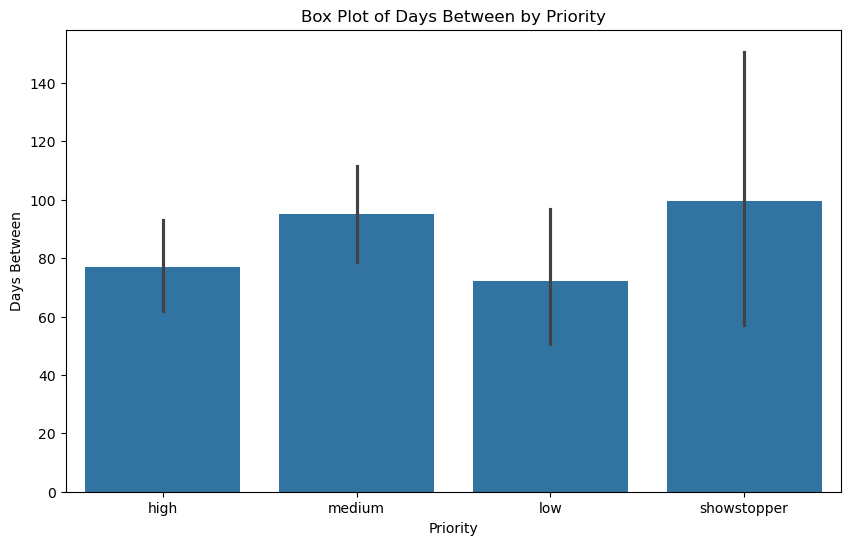

In [21]:
import matplotlib.pyplot as plt

import seaborn as sns


plt.figure(figsize=(10, 6))
sns.barplot(x='priority', y='days_between', data=emr_data1)
plt.xlabel('Priority')
plt.ylabel('Days Between')
plt.title('Box Plot of Days Between by Priority')
plt.show()



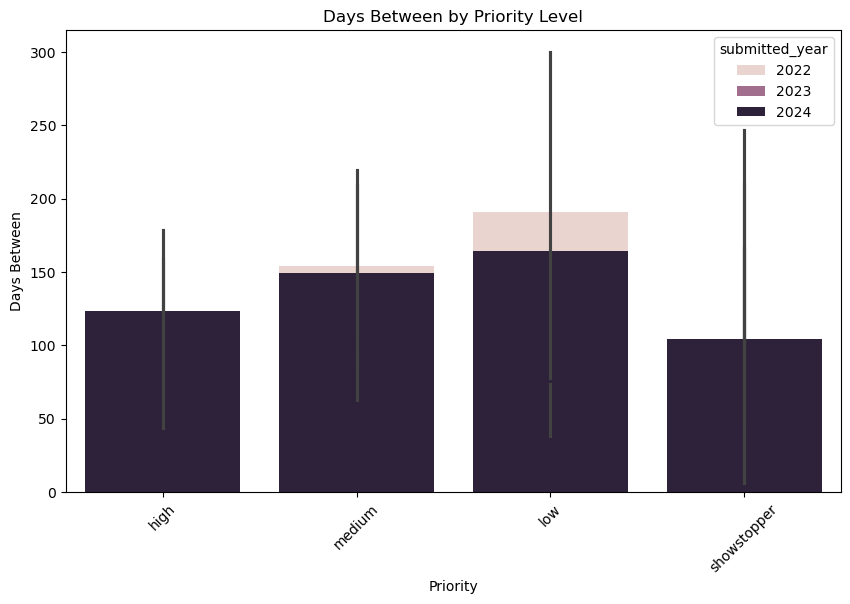

In [22]:
#import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.barplot(data=emr_data1, x='priority', y='days_between', hue='submitted_year', dodge=False)
plt.title('Days Between by Priority Level')
plt.ylabel('Days Between')
plt.xlabel('Priority')
plt.xticks(rotation=45)
plt.show()


In [5]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile) for 'days_between'
Q1 = emr_data1['days_between'].quantile(0.25)
Q3 = emr_data1['days_between'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter to get outliers (values below the lower bound or above the upper bound)
outliers = emr_data1[(emr_data1['days_between'] < lower_bound) | (emr_data1['days_between'] > upper_bound)]


outliers_table = outliers[['title','priority','days_between','submitted_year']]
outliers_table.sort_values(by='days_between', ascending=False)



,title,priority,days_between,submitted_year
171,[EMR][CXL][MCC]Post moka shows MCA_IAL_TX_RUN_...,medium,514,2023
306,[EMR][A1][CXL] reserved bits are set in H2D da...,medium,494,2023
183,[Cluster][MCC-XCC R1-A1] MCA_DISPATCHER_RUN_B...,medium,418,2023
310,[Cluster][XCC A1][MCA_WATCHDOG_TIMEOUT_BULK_CR...,medium,378,2023
77,[EMR][XCC][A1] EMR PPV - DRG Sanity MUC Failin...,medium,371,2023
86,[EMR XCC] Prod POF enablement: S3M is not resp...,high,361,2022
368,[Bytedance][Yichun][Nettrix] NVMe PCIe speed d...,high,356,2023
198,[EMR-PO][A0][RAS]: CHA mc_status & UBOX mc_mis...,medium,354,2022
88,EMR PO: Errata update - MSR for DDIO Mask won...,low,354,2022
126,[EMR XCC A0 PO][PC6] DMI not reporting idle an...,medium,346,2022


In [6]:
print(IQR) ### it's used to identify the spread of the central portion of the data,captures the middle 50%.
print(lower_bound) 
print(upper_bound) ### Any data points with values above this threshold are considered outliers.

109.0
-150.5
285.5


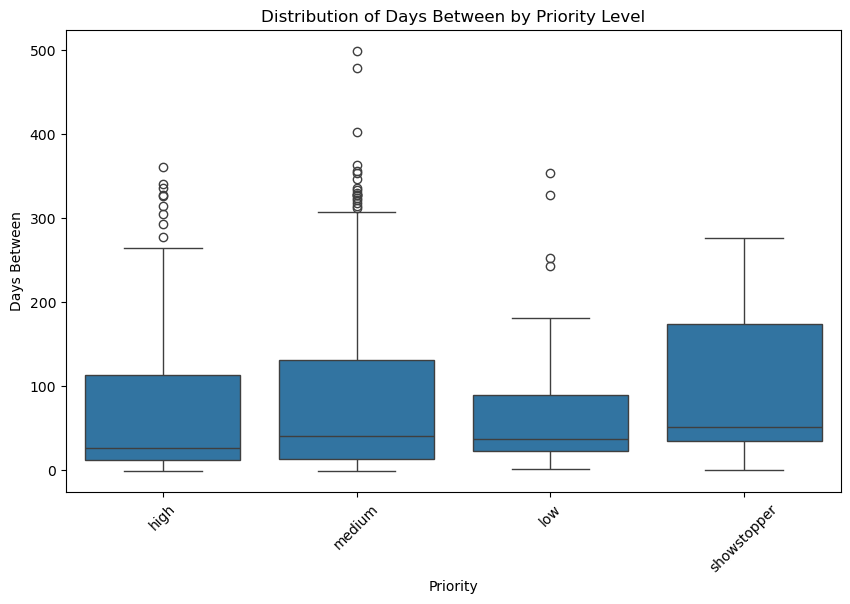

In [9]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=emr_data1, x='priority', y='days_between')
plt.title('Distribution of Days Between by Priority Level')
plt.ylabel('Days Between')
plt.xlabel('Priority')
plt.xticks(rotation=45)
plt.show()


In [20]:
fd=emr_data1[emr_data1['days_between'] >= 281.75]
fd

,id,updated_date,component,family,release,priority,title,status_reason,submitted_date,closed_date,owner,sighting.conclusion,sighting.team_found,priority_num,submitted_year,days_between
17,14018000504,9/10/2023 23:39,hw.fuse,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR XCC] Wrong mapping on SST-TF mailbox for ...,complete_validated,2022-11-17 02:51:00,2023-10-09 23:39:00.000000,coramire,hw.bug,sv.enabling,2,2022,326
18,14018000516,10/10/2023 21:53,hw.fuse,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC] Wrong Turbo Bin bucket 7 impacting P...,complete_validated,2022-11-17 03:02:00,2023-10-10 21:53:00.000000,coramire,hw.bug,sv.enabling,3,2022,327
23,14018183474,10/10/2023 20:11,hw.fuse,Emerald Rapids-SP-MCC Die,emrsp_mcc_r0,high,[EMR MCC] Wrong mapping on SST-TF mailbox for ...,complete_validated,2022-12-09 18:16:00,2023-10-10 20:11:00.000000,coramire,hw.bug,sv.enabling,2,2022,305
76,14020089463,19/06/2024 04:14,fw.ltm,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][EMR_A1_SVOS_VV][PECI] pecirand return 0x...,rejected_cannot_reproduce,2023-08-11 20:12:00,2024-06-19 04:14:00.000000,cadoming,no_root_cause.rejected,sv,3,2023,312
77,14020784944,21/05/2024 23:37,hw.big_core,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[EMR][XCC][A1] EMR PPV - DRG Sanity MUC Failin...,root_caused_pursuing_fix,2023-11-06 16:50:00,2024-10-31 10:22:41.334856,bcalhoon,hw.tuning,mfg.ppv,3,2023,359
78,15014859759,3/2/2024 14:45,fw.other,Emerald Rapids-SP-XNC Die,emrsp_xcc_a1,medium,[Cluster][EMR][XCC][A1][BKC24] SPECCPU povray ...,root_caused_awaiting_fix,2023-12-11 01:22:00,2024-10-31 10:22:41.334856,bushengw,fw.bug,bu_platform,3,2023,325
86,14017745683,10/10/2023 20:10,val.env.configuration,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,high,[EMR XCC] Prod POF enablement: S3M is not resp...,complete_validated,2022-10-13 21:50:00,2023-10-10 20:10:00.000000,dramosol,env.bug,sv.enabling,2,2022,361
88,14017804101,10/10/2023 23:00,fw.ucode,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,low,EMR PO: Errata update - MSR for DDIO Mask won...,complete_wont_validate,2022-10-21 17:54:00,2023-10-10 23:00:00.000000,dvalgano,hw.bug,sv.execution,4,2022,354
91,14018006530,10/10/2023 21:54,val.env.configuration,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR][PTV] System early Cattrip On 385W EMR P...,complete_validated,2022-11-17 17:58:00,2023-10-10 21:54:00.000000,gomeseva,env.bug,sv.enabling,3,2022,327
126,14017859773,10/10/2023 21:51,hw.dmi,Emerald Rapids-SP-XNC Die,emrsp_xcc_a0,medium,[EMR XCC A0 PO][PC6] DMI not reporting idle an...,complete_validated,2022-10-29 00:41:00,2023-10-10 21:50:00.000000,hmpicosm,hw.bug,sv.enabling,3,2022,346


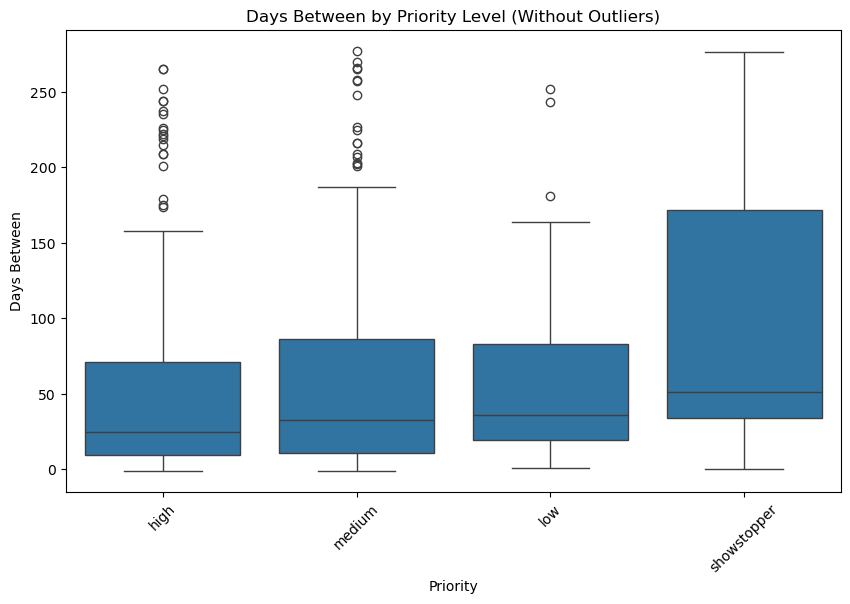

In [46]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=fd, x='priority', y='days_between')
plt.title('Days Between by Priority Level (Without Outliers)')
plt.ylabel('Days Between')
plt.xlabel('Priority')
plt.xticks(rotation=45)
plt.show()


In [15]:
#### QTY BY DAYS AND PRIORITY (TOTAL=353)

emr_data1[["days_between","priority"]].groupby("priority").count()

,days_between
priority,
high,129
low,46
medium,163
showstopper,15


In [6]:

#### QTY BY YEAR, PRIORITY (TOTAL=372)

emr_data1.groupby(["submitted_year"])["priority"].value_counts()


submitted_year  priority   
2022            high            30
                medium          30
                showstopper      9
                low              5
2023            medium         137
                high            94
                low             40
                showstopper      4
2024            high            11
                medium           8
                showstopper      3
                low              1
Name: count, dtype: int64

In [12]:
emr_data1.groupby(["submitted_year"])["status_reason"].value_counts()


submitted_year  status_reason            
2022            complete_validated           46
                rejected_not_a_defect        14
                complete                      4
                rejected_merged               4
                complete_wont_validate        3
                rejected_filed_by_mistake     2
                rejected_wont_do              1
2023            rejected_not_a_defect        98
                complete_validated           68
                rejected_merged              29
                rejected_wont_do             24
                complete_wont_validate       17
                complete                     13
                rejected_filed_by_mistake    12
                rejected_cannot_reproduce     5
                root_caused_awaiting_fix      4
                root_caused_pursuing_fix      4
                open_clone                    1
2024            root_caused_pursuing_fix      6
                rejected_not_a_defect         

In [7]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist

# Download stopwords and punkt if you haven't already
nltk.download('punkt')
nltk.download('stopwords')

def process_by_word_frequency(datafeb):
    # Set of stopwords
    stop_words = set(stopwords.words('english'))
    
    # Tokenize titles and remove stopwords
    datafeb['title_tokens'] = datafeb['cleaned_description'].apply(lambda cleaned_description: [
        word for word in word_tokenize(str(cleaned_description).lower()) if word.isalnum() and word not in stop_words
    ])
    
    # Flatten the list of all words in the 'title' column to compute frequencies
    all_words = [word for tokens in datafeb['title_tokens'] for word in tokens]
    
    # Compute word frequency distribution
    freq_dist = FreqDist(all_words)
    
    # Assign the most frequent words in each title to a new column
    datafeb['frequent_words'] = datafeb['title_tokens'].apply(lambda tokens: [
        word for word in tokens if freq_dist[word] > 1  # Threshold of 1, you can adjust
    ])
    
    return datafeb

# Apply the function to your dataset
datafeb = process_by_word_frequency(datafeb)

# Show the results
emr_nlp=datafeb[['description', 'frequent_words']].head(20)


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\oscarahe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


KeyError: 'cleaned_description'

In [118]:
pd.DataFrame(emr_nlp)
emr_nlp

,description,frequent_words
0,<p>We booted 2 separate EMR systems (64C350W a...,"[booted, 2, separate, emr, systems, 385w, conn..."
1,"<span style=""font-size: 12.18px;"">BIOS needs t...","[bios, needs, change, mode, all2all, cxl, chos..."
2,<p>Observing failing Rx JTOL results at 85C .9...,"[observing, failing, rx, results, xtalk, enabl..."
3,<div>Observing completely closed eye once xtal...,"[observing, completely, eye, xtalk, enabled, a..."
4,"<p><span style=""font-size: 16px;"">Regarding th...","[regarding, xccmcc, es2, cpu, pirom, size, err..."
5,"<p style=""padding: 0px; color: rgb(33, 37, 41)...","[emr, xccmcc, es2, cpu, pirom, size, display, ..."
6,<p>Found issue on a RB</p><p><br /></p><p>Host...,"[found, issue, 5600cpu, found, 1, 25, 1, host,..."
7,<p>From the A1 VV 100 Boot Training Repeatabil...,"[a1, vv, 100, boot, training, repeatability, d..."
8,<p>&nbsp;When tuning the EMR EPP settings for ...,"[tuning, emr, epp, settings, balanced, mode, c..."
9,"<p><span style=""color: rgb(0, 0, 255); backgro...","[quotsightingquot, cloned, request, subsequent..."


In [119]:
emr_nlp['frequent_words'].sort_values()

7     [a1, vv, 100, boot, training, repeatability, d...
1     [bios, needs, change, mode, all2all, cxl, chos...
0     [booted, 2, separate, emr, systems, 385w, conn...
18    [configqdf, q1cfbios, egsdcrb186b0092d11221031...
11    [data, doesnt, trip, due, output, getting, tem...
5     [emr, xccmcc, es2, cpu, pirom, size, display, ...
12    [failing, 0, actual, 0xb, expected, 3124, conf...
6     [found, issue, 5600cpu, found, 1, 25, 1, host,...
14                                [gtgtgt, slice, core]
17                                                [nan]
16                                                [nan]
19                                                [nan]
3     [observing, completely, eye, xtalk, enabled, a...
2     [observing, failing, rx, results, xtalk, enabl...
9     [quotsightingquot, cloned, request, subsequent...
4     [regarding, xccmcc, es2, cpu, pirom, size, err...
10    [span, stylefontsize105ptmsobidifontsize110pt,...
15    [system, end, 8b, nbsp, infonbsp, nbsp, nb

In [5]:
import spacy
nlp = spacy.load("en_core_web_sm")

# Procesar cada texto en la columna del DataFrame
d['processed'] = d['Conducted Tests'].apply(lambda x: nlp(x))
print(d['processed'])

0     (Initial, tests, with, updated, CPLD, code, an...
1     (The, ticket, was, submitted, and, then, rejec...
2     (Converted, to, a, low, priority, sighting, si...
3     (Adriana, collected, TYP, &, Fast, units, data...
4     (The, issue, was, merged, with, another, ticke...
5     (Validation, GAP, between, IVE, and, PAIV, was...
6     (The, same, error, was, found, on, two, other,...
7     (The, team, agreed, that, despite, the, flat, ...
8     (The, decision, was, made, to, change, the, sl...
9     (The, ticket, was, cloned, from, a, server, fe...
10    (Kicked, off, TF, to, tackle, the, issue, ., D...
11    (Checked, all, domains, in, Comp, PI, and, Mas...
12    (Booted, both, parts, with, Q1CA, static, fuse...
13    (System, is, seeing, core, MCAs, when, running...
14    (Corroborated, on, 2, more, parts, ., Observed...
15    (Experimented, with, fuse, overrides, as, per,...
16    (Observed, TOR, timeouts, and, 3, -, Strike, t...
17    (The, problem, was, resolved, with, a, CRI

C:\Users\oscarahe\AppData\Local\Temp\ipykernel_18556\2421016306.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['processed'] = d['Conducted Tests'].apply(lambda x: nlp(x))


In [7]:
# Extraer vectores
d['vector'] = d['processed'].apply(lambda doc: doc.vector)
print(d['vector'])

0     [0.045638748, 0.063494585, 0.08178484, 0.14371...
1     [0.24711889, -0.18206367, 0.20867576, 0.062648...
2     [-0.03461285, 0.1233759, -0.08796378, 0.187280...
3     [0.09561857, -0.04322217, -0.23106146, 0.13453...
4     [0.2234806, -0.01871398, 0.13939294, 0.1181846...
5     [0.32149193, -0.26638433, -0.21121567, 0.42898...
6     [-0.028839564, 0.058022052, -0.12069877, 0.802...
7     [0.17465997, -0.319076, 0.16519591, 0.32562694...
8     [-0.0044564856, -0.28351825, 0.12402934, 0.003...
9     [0.12268345, -0.2869405, 0.07892486, -0.015351...
10    [0.002198665, -0.17672636, -0.18027593, -0.158...
11    [-0.12323248, -0.108390115, -0.20243292, 0.071...
12    [-0.40757152, 0.10075442, -0.15835048, 0.01896...
13    [0.12989071, -0.24622804, -0.014259338, -0.079...
14    [-0.32041672, 0.10800926, -0.23515342, 0.12159...
15    [0.13941382, -0.328199, 0.17333423, -0.0676046...
16    [-0.029568564, -0.05427686, -0.16316602, 0.150...
17    [0.22180784, -0.1444025, 0.18180478, 0.265

C:\Users\oscarahe\AppData\Local\Temp\ipykernel_18556\2968532313.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  d['vector'] = d['processed'].apply(lambda doc: doc.vector)


In [8]:
# Verificar la forma de los vectores
print(d['vector'].apply(lambda x: x.shape))

0     (96,)
1     (96,)
2     (96,)
3     (96,)
4     (96,)
5     (96,)
6     (96,)
7     (96,)
8     (96,)
9     (96,)
10    (96,)
11    (96,)
12    (96,)
13    (96,)
14    (96,)
15    (96,)
16    (96,)
17    (96,)
18    (96,)
19    (96,)
20    (96,)
21    (96,)
22    (96,)
23    (96,)
24    (96,)
25    (96,)
26    (96,)
27    (96,)
28    (96,)
29    (96,)
30    (96,)
31    (96,)
32    (96,)
33    (96,)
34    (96,)
35    (96,)
36    (96,)
Name: vector, dtype: object


In [18]:
# Extract the column as a 2D array
X = d[['Processed']].values

# Initialize DBSCAN
# Note: You may need to adjust eps and min_samples based on your data
dbscan = DBSCAN(eps=3, min_samples=2)

# Fit the model
dbscan.fit(X)

# Get the labels
labels = dbscan.labels_

# Add the labels to the DataFrame
d['Processed'] = labels

print(d)

# Visualize the clusters
plt.scatter(d.index, d['Processed'], c=labels, cmap='viridis')
plt.title('DBSCAN Clustering on Column A')
plt.xlabel('Index')
plt.ylabel('Value')
plt.show()


KeyError: "None of [Index(['Processed'], dtype='object')] are in the [columns]"

In [9]:
import pandas as pd
from sklearn.cluster import DBSCAN
import numpy as np

# Assuming 'd' is your DataFrame and 'vector' is the column with vectors
# Convert the 'vector' column to a 2D numpy array
X = np.array(d['vector'].tolist())

# Initialize DBSCAN
# Note: You may need to adjust eps and min_samples based on your data
dbscan = DBSCAN(eps=0.5, min_samples=8, metric='cosine')  # Using cosine distance for text data

# Fit the model
dbscan.fit(X)

# Get the labels
labels = dbscan.labels_

# Add the labels to the DataFrame
d['Cluster'] = labels

print(d[['processed','Cluster']])

                                            processed  Cluster
0   (Initial, tests, with, updated, CPLD, code, an...        0
1   (The, ticket, was, submitted, and, then, rejec...        0
2   (Converted, to, a, low, priority, sighting, si...        0
3   (Adriana, collected, TYP, &, Fast, units, data...        0
4   (The, issue, was, merged, with, another, ticke...        0
5   (Validation, GAP, between, IVE, and, PAIV, was...        0
6   (The, same, error, was, found, on, two, other,...        0
7   (The, team, agreed, that, despite, the, flat, ...        0
8   (The, decision, was, made, to, change, the, sl...        0
9   (The, ticket, was, cloned, from, a, server, fe...        0
10  (Kicked, off, TF, to, tackle, the, issue, ., D...        0
11  (Checked, all, domains, in, Comp, PI, and, Mas...        0
12  (Booted, both, parts, with, Q1CA, static, fuse...        0
13  (System, is, seeing, core, MCAs, when, running...        0
14  (Corroborated, on, 2, more, parts, ., Observed...  

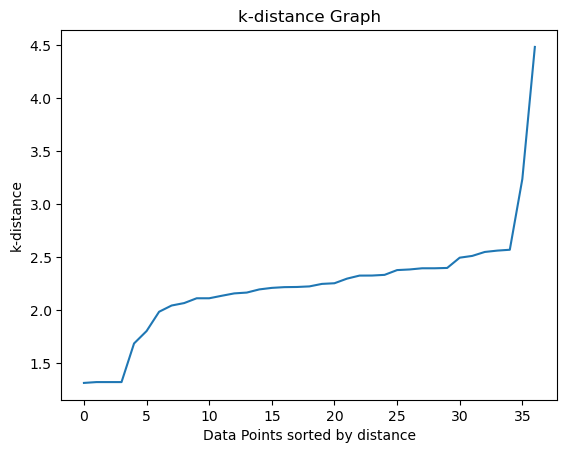

                                            processed  Cluster
0   (Initial, tests, with, updated, CPLD, code, an...        0
1   (The, ticket, was, submitted, and, then, rejec...        0
2   (Converted, to, a, low, priority, sighting, si...        0
3   (Adriana, collected, TYP, &, Fast, units, data...        0
4   (The, issue, was, merged, with, another, ticke...        0
5   (Validation, GAP, between, IVE, and, PAIV, was...        0
6   (The, same, error, was, found, on, two, other,...        0
7   (The, team, agreed, that, despite, the, flat, ...        0
8   (The, decision, was, made, to, change, the, sl...        0
9   (The, ticket, was, cloned, from, a, server, fe...        0
10  (Kicked, off, TF, to, tackle, the, issue, ., D...        0
11  (Checked, all, domains, in, Comp, PI, and, Mas...        0
12  (Booted, both, parts, with, Q1CA, static, fuse...        0
13  (System, is, seeing, core, MCAs, when, running...        0
14  (Corroborated, on, 2, more, parts, ., Observed...  

In [19]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors

# Assuming X is your 2D array of vectors
X = np.array(d['vector'].tolist())

# Use NearestNeighbors to find the k-distance
k = 4  # Typically, k is set to min_samples - 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(X)
distances, indices = neighbors_fit.kneighbors(X)

# Sort and plot the distances
distances = np.sort(distances[:, k-1], axis=0)
plt.plot(distances)
plt.title('k-distance Graph')
plt.xlabel('Data Points sorted by distance')
plt.ylabel('k-distance')
plt.show()

# Adjust DBSCAN parameters based on the plot
dbscan = DBSCAN(eps=0.4, min_samples=5, metric='cosine')  # Adjust eps based on the plot

# Fit the model
dbscan.fit(X)

# Get the labels
labels = dbscan.labels_

# Add the labels to the DataFrame
d['Cluster'] = labels

print(d[['processed', 'Cluster']])

In [20]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_md')  # Ensure you have this model installed

# Sample DataFrame
data = {
    'processed': [
        "Initial tests with updated CPLD code and fixed strap were successful.",
        "The ticket was submitted and then rejected as it was filed in the wrong database.",
        # Add more text data here
    ]
}
d = pd.DataFrame(data)

# Convert text to vectors using spaCy
d['vector'] = d['processed'].apply(lambda doc: nlp(doc).vector)

# Convert the 'vector' column to a 2D numpy array
X = np.array(d['vector'].tolist())

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.4, min_samples=2, metric='cosine')  # Adjust parameters as needed

# Fit the model
dbscan.fit(X)

# Get the labels
labels = dbscan.labels_

# Add the labels to the DataFrame
d['Cluster'] = labels

# Count the number of unique clusters (excluding noise)
unique_clusters = len(set(labels) - {-1})

print(f"Number of clusters (excluding noise): {unique_clusters}")
print(d[['processed', 'Cluster']])

Number of clusters (excluding noise): 1
                                           processed  Cluster
0  Initial tests with updated CPLD code and fixed...        0
1  The ticket was submitted and then rejected as ...        0


In [26]:
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import spacy

# Load spaCy model
nlp = spacy.load('en_core_web_md')  # Ensure you have this model installed


# Convert text to vectors using spaCy
d['vector'] = d['processed'].apply(lambda doc: nlp(doc).vector)

# Convert the 'vector' column to a 2D numpy array
X = np.array(d['vector'].tolist())

# Initialize DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2, metric='cosine')  # Adjust parameters as needed

# Fit the model
dbscan.fit(X)

# Get the labels
labels = dbscan.labels_

# Add the labels to the DataFrame
d['Cluster'] = labels

print(d[['processed', 'Cluster']])

OSError: [E050] Can't find model 'en_core_web_md'. It doesn't seem to be a Python package or a valid path to a data directory.

In [31]:
priority_data = emr_data[['sighting_central_root']]
priority_data

,sighting_central_root
0,ON QDF Q1CF noticed that fuse pcode_turbo_rati...
1,"Test card issue , need to follow up with that ..."
2,Active idle addition to SST in feature linked ...
3,Bug on Mcheck with 12way Internleave -> check...
4,Declaring apparent GPSB congestion as hardware...
5,"Hynix bug, more details on the hynix com"
6,Known bug https://hsdes.intel.com/appstore/art...
7,"BIOS bug, feature request here https://hsdes.i..."
8,Fuse addressing change for EMR not conveyed to...
9,Add FUSA_CONST.PATCHLET to patch release


In [19]:
# Perform K-means clustering
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=0)
d['vector'] = kmeans.fit_predict(d)

ValueError: could not convert string to float: 'The issue involves EMR systems throttling due to external prochot when connected as 2Sockets. The problem does not occur when the second socket is removed or the UPI link is disabled to make it a 1-socket configuration. The core frequency drops significantly during the issue.'

In [34]:
# Count the number of sightings in each cluster
cluster_counts = emr_data['vector'].value_counts().sort_index()

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [118]:
# Define cluster names based on the priority mapping
#inverse_priority_mapping = {v: k for k, v in vector.items()}
#cluster_names = [inverse_priority_mapping[i + 1] for i in cluster_counts.index]

NameError: name 'vector' is not defined

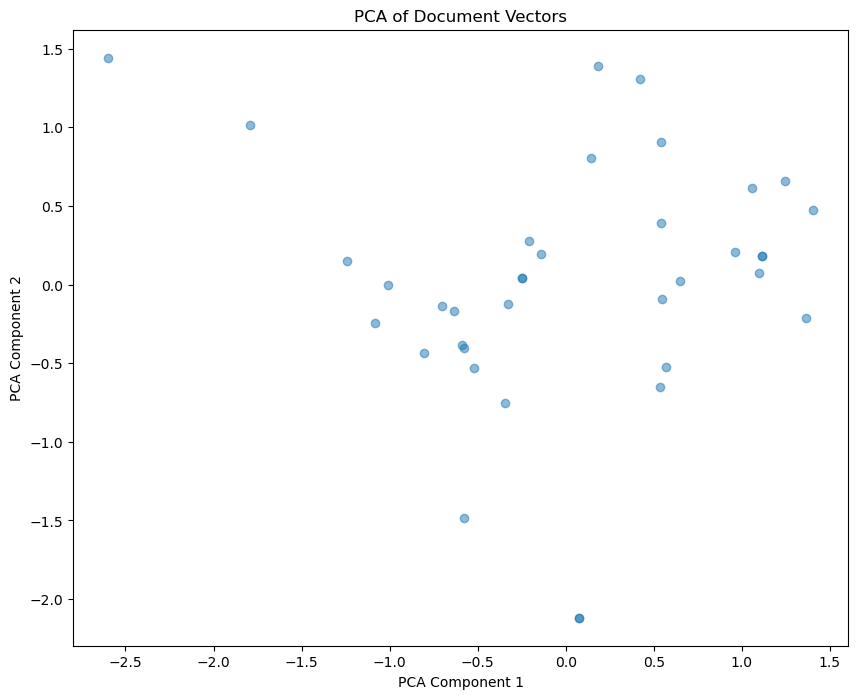

In [56]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=5)
reduced_vectors = pca.fit_transform(d['vector'].tolist())

# Plot the reduced vectors
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], alpha=0.5)
plt.title('PCA of Document Vectors')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


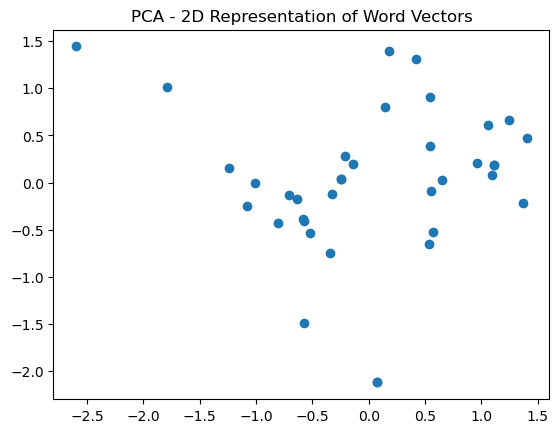

In [57]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Reduce to 2D using PCA
pca = PCA(n_components=5)
vectors_2d = pca.fit_transform(d['vector'].tolist())

# Plot the 2D vectors
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1])
plt.title('PCA - 2D Representation of Word Vectors')
plt.show()


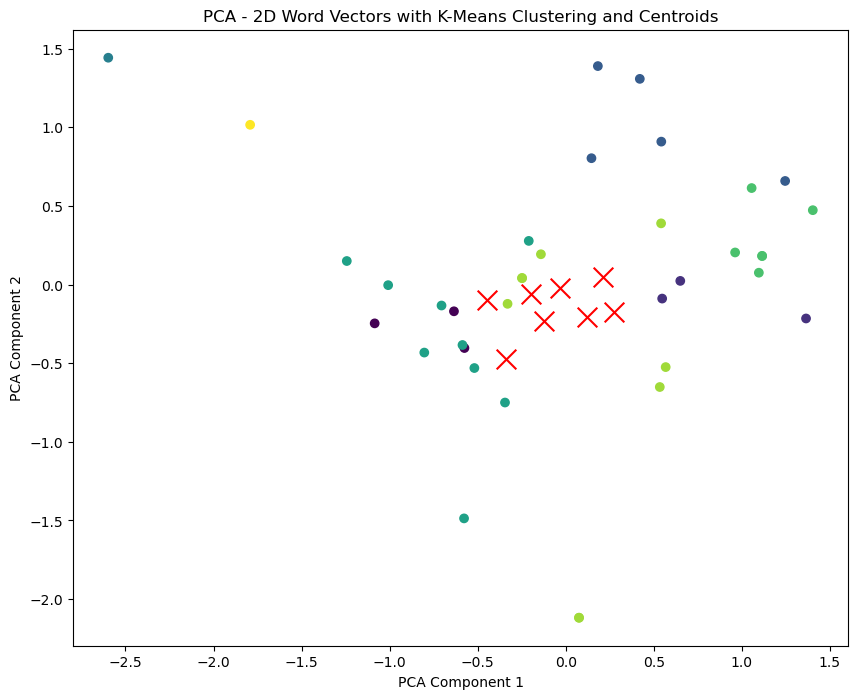

In [58]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Apply PCA to reduce to 2 components for visualization
pca = PCA(n_components=2)
reduced_vectors = pca.fit_transform(d['vector'].tolist())

# Apply K-Means clustering
kmeans = KMeans(n_clusters=8, random_state=42)
d['cluster'] = kmeans.fit_predict(d['vector'].tolist())
centers = kmeans.cluster_centers_

# Plot clusters with centroids
plt.figure(figsize=(10, 8))
plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], c=d['cluster'], cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200)
plt.title('PCA - 2D Word Vectors with K-Means Clustering and Centroids')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()



In [33]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(d['vector'].tolist(), d['cluster'])
print(f'Silhouette Score: {silhouette_avg}')


Silhouette Score: 0.01653982512652874


In [34]:
cluster_counts = d['cluster'].value_counts()
print(cluster_counts)


cluster
1    13
7     7
4     6
0     3
2     3
6     3
3     1
5     1
Name: count, dtype: int64


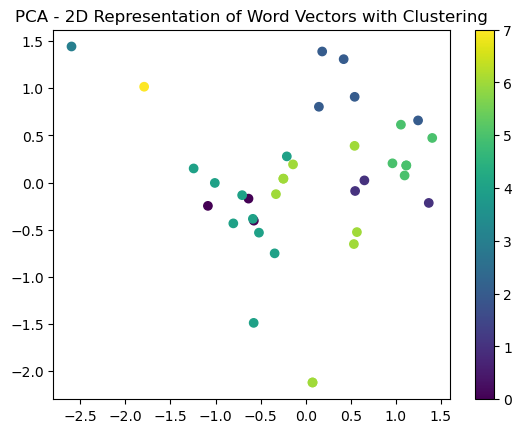

In [59]:
# Assuming you have cluster or label data in 'emr_data1['cluster']'
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=d['cluster'], cmap='viridis')
plt.colorbar()
plt.title('PCA - 2D Representation of Word Vectors with Clustering')
plt.show()


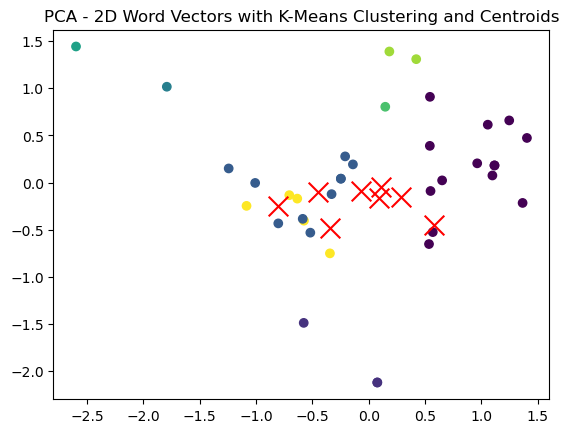

In [60]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=8, random_state=20)
d['cluster'] = kmeans.fit_predict(d['vector'].tolist())
centers = kmeans.cluster_centers_

# Plot clusters with centroids
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c=d['cluster'], cmap='viridis', marker='o')
plt.scatter(centers[:, 0], centers[:, 1], c='red', marker='x', s=200)
plt.title('PCA - 2D Word Vectors with K-Means Clustering and Centroids')
plt.show()


In [37]:
# Calculate the mean of PCA_Component_1 and PCA_Component_2
centroid_pca1 = d['PCA_Component_1'].mean()
centroid_pca2 = d['PCA_Component_2'].mean()



print(f"Centroid of PCA Component 1: {centroid_pca1}")
print(f"Centroid of PCA Component 2: {centroid_pca2}")


KeyError: 'PCA_Component_1'

In [31]:
import matplotlib.pyplot as plt

# Scatter plot for PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA_Component_1'], pca_df['PCA_Component_2'], color='blue', label='PCA Components')

# Plot the centroid
plt.scatter(centroid_pca1, centroid_pca2, color='red', label='Centroid', s=200, edgecolor='black')

# Adding labels and title
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of PCA Components with Centroid')
plt.legend()

plt.show()


NameError: name 'pca_df' is not defined

<Figure size 800x600 with 0 Axes>

In [62]:
import pandas as pd

# Create a DataFrame for PCA results
pca_df = pd.DataFrame({
    'Index': d.index,
    'Processed_Text': d['Conducted Tests'],  # or use original text column
    'PCA_Component_1': vectors_2d[:, 0],
    'PCA_Component_2': vectors_2d[:, 1]
})

# Display the first few rows of the table
print(pca_df.head())


   Index                                     Processed_Text  PCA_Component_1  \
0      0  Initial tests with updated CPLD code and fixed...        -0.209748   
1      1  The ticket was submitted and then rejected as ...         1.246188   
2      2  Converted to a low priority sighting since two...        -0.140715   
3      3  Adriana collected TYP & Fast units data withou...        -1.084798   
4      4          The issue was merged with another ticket.         1.055923   

   PCA_Component_2  
0         0.278004  
1         0.659207  
2         0.193085  
3        -0.246568  
4         0.614120  


In [63]:
# Calculate min and max for PCA Component 1
pca1_min = pca_df['PCA_Component_1'].min()
pca1_max = pca_df['PCA_Component_1'].max()

# Calculate min and max for PCA Component 2
pca2_min = pca_df['PCA_Component_2'].min()
pca2_max = pca_df['PCA_Component_2'].max()

# Display the results
print("PCA Component 1 - Min:", pca1_min, "Max:", pca1_max)
print("PCA Component 2 - Min:", pca2_min, "Max:", pca2_max)


PCA Component 1 - Min: -2.5978020584116503 Max: 1.403293931450033
PCA Component 2 - Min: -2.1188533431920553 Max: 1.4431223508193212


In [17]:
pca_df[pca_df["PCA_Component_1"] ==3.5486595992506653 ]["Processed_Text"].values[0]

IndexError: index 0 is out of bounds for axis 0 with size 0

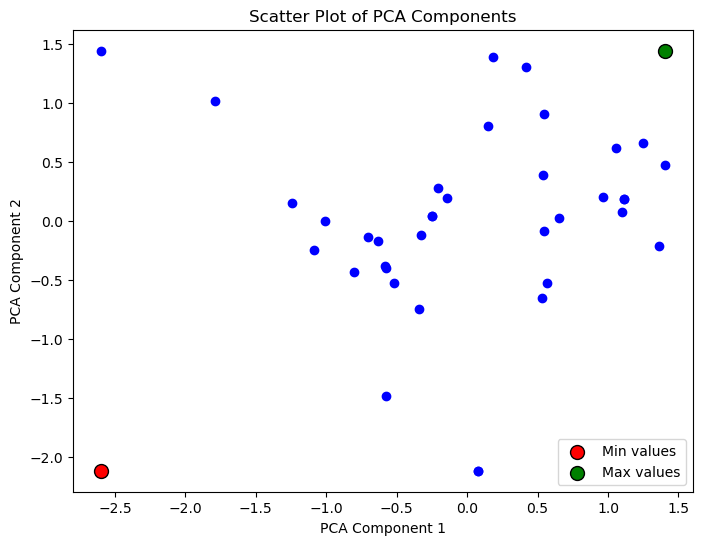

In [64]:
# Scatter plot for PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA_Component_1'], pca_df['PCA_Component_2'], color='blue')

# Highlight the min and max points
plt.scatter(pca1_min, pca2_min, color='red', label='Min values', s=100, edgecolor='black')
plt.scatter(pca1_max, pca2_max, color='green', label='Max values', s=100, edgecolor='black')

# Adding labels
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Scatter Plot of PCA Components')
plt.legend()

plt.show()


In [30]:
import numpy as np

# Centroids (assuming you've already calculated them)
centroid_pca1 = pca_df['PCA_Component_1'].mean()
centroid_pca2 = pca_df['PCA_Component_2'].mean()

# Function to calculate the Euclidean distance from the centroids
def calculate_distance(row):
    return np.sqrt((row['PCA_Component_1'] - centroid_pca1)**2 + (row['PCA_Component_2'] - centroid_pca2)**2)

# Apply the function to each row in the DataFrame to calculate the distance to the centroid
pca_df['Distance_to_Centroid'] = pca_df.apply(calculate_distance, axis=1)

# Find the row with the minimum distance to the centroid (closest to the centroid)
closest_to_centroid = pca_df.loc[pca_df['Distance_to_Centroid'].idxmin()]

# Get the index of the closest title and retrieve the title from emr_data1
index_value = closest_to_centroid.name
title_closest_to_centroid = emr_data1.loc[index_value, 'title']

# Extract the PCA values for the closest point
closest_pca1 = closest_to_centroid['PCA_Component_1']
closest_pca2 = closest_to_centroid['PCA_Component_2']

print(f"The title closest to the centroid is: {title_closest_to_centroid}")
print(f"The PCA values for this title are: PCA_Component_1 = {closest_pca1}, PCA_Component_2 = {closest_pca2}")



The title closest to the centroid is: [ECC TF][Micron Bucket 1] RE32 fails at 5200 with UCECC
The PCA values for this title are: PCA_Component_1 = -0.001144058497944465, PCA_Component_2 = 0.016128334253113732


In [66]:
from sklearn.cluster import KMeans

# Apply K-Means clustering
kmeans = KMeans(n_clusters=5, random_state=62)
d['cluster'] = kmeans.fit_predict(d['vector'].tolist())

# Display the cluster assignment with the title
new=print(df[['ID','Conducted Tests','cluster']])
new=(df[['ID','Conducted Tests','cluster']])
new.to_csv("clusters_March4_Conducted.csv")

             ID                                    Conducted Tests  cluster
0   14018151333  Initial tests with updated CPLD code and fixed...        4
1   14018509356  The ticket was submitted and then rejected as ...        0
2   14019055430  Converted to a low priority sighting since two...        3
3   14019247088  Adriana collected TYP & Fast units data withou...        0
4   15013435531          The issue was merged with another ticket.        2
5   15013435860  Validation GAP between IVE and PAIV was identi...        2
6   14019978515       The same error was found on two other hosts.        1
7   14019985093  The team agreed that despite the flat DFE resp...        1
8   14020175013  The decision was made to change the slope valu...        4
9   14020314810  The ticket was cloned from a server feature re...        4
10  14017677523  Kicked off TF to tackle the issue. Debugging i...        1
11  14017818057  Checked all domains in Comp PI and Master PI. ...        2
12  14017827

In [45]:
labels = kmeans.labels_

# Añadir las etiquetas al DataFrame
d['cluster'] = labels

print(d[['processed','Failure Description','cluster']].head())

                                           processed  \
0  (The, issue, involves, EMR, systems, throttlin...   
1  (BIOS, needs, to, change, the, mode, to, All2A...   
2  (Observing, failing, Rx, JTOL, results, at, 85...   
3  (Observing, completely, closed, eye, once, xta...   
4  (Regarding, the, XCC, /, MCC, ES2, CPU, PIROM,...   

                                 Failure Description  cluster  
0  The issue involves EMR systems throttling due ...        0  
1  BIOS needs to change the mode to All2All when ...        0  
2  Observing failing Rx JTOL results at 85C .92V ...        4  
3  Observing completely closed eye once xtalk is ...        0  
4  Regarding the XCC/MCC ES2 CPU PIROM size error...        1  


In [46]:
new.to_csv('clusters_nuevoMarch4.csv')

AttributeError: 'NoneType' object has no attribute 'to_csv'

In [10]:
# Display titles in each cluster
for cluster_num in range(8):
    print(f"Cluster {cluster_num}:")
    cluster_titles = d[d['cluster'] == cluster_num]['Failure Description'].values
    for sighting_central_root in cluster_titles:
        print(f" - {sighting_central_root}")
    print("\n")#Creates a blank line


Cluster 0:
 - ON QDF Q1CF noticed that fuse pcode_turbo_ratio_limit_ratios_cdyn_index3_ratio7=0x1a has a wrong value


Cluster 1:
 - Hynix bug, more details on the hynix com
 - Hynix bug, more details on the hynix com
 - Hynix bug, more details on the hynix com


Cluster 2:
 - Pcode patch


Cluster 3:
 - Active idle addition to SST in feature linked to SPR sighting
 - Fuse addressing change for EMR not conveyed to pCode workaround
 - Alignment of pCode structure allocation to core count maximum
 - PI5 instance number difference between SPR and EMR led to hole in EMR LTM mapping


Cluster 4:
 - Add FUSA_CONST.PATCHLET to patch release


Cluster 5:
 - see comments


Cluster 6:
 - Test card issue , need to follow up with that team
 - Bug on Mcheck with 12way Internleave ->  check channel wayness only for protected memory , IP bug here https://hsdes.intel.com/appstore/article/#/13010830858
 - Known bug https://hsdes.intel.com/appstore/article/#/16020034811 will take same path as SPR
 - BIO

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(emr_data1['vector'].tolist(), emr_data1['days_between'], test_size=0.3, random_state=42)

# Train a logistic regression model
clf = LogisticRegression()
clf.fit(X_train, y_train)

# Evaluate the model
print("Model accuracy: ", clf.score(X_test, y_test))


Model accuracy:  0.0625


In [14]:
from sklearn.linear_model import LinearRegression

# Train a linear regression model
reg = LinearRegression()
reg.fit(X_train, y_train)

# Evaluate the model
print("Model R^2 score: ", reg.score(X_test, y_test))


Model R^2 score:  -0.7886431217193604


In [31]:
from sklearn.ensemble import RandomForestRegressor

# Train a random forest regressor
rf = RandomForestRegressor()
rf.fit(X_train, y_train)

# Evaluate the model
print("Model R^2 score: ", rf.score(X_test, y_test))


Model R^2 score:  -0.0420700744608864


In [15]:
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity between vectors
similarity_matrix = cosine_similarity(emr_data1['vector'].tolist())

# Display similarity matrix
print(similarity_matrix)


[[0.9999999  0.48714408 0.6706345  ... 0.60565263 0.5236038  0.6578199 ]
 [0.48714408 0.9999999  0.5594558  ... 0.67530334 0.51681894 0.5264227 ]
 [0.6706345  0.5594558  0.9999998  ... 0.7378689  0.5968982  0.7253362 ]
 ...
 [0.60565263 0.67530334 0.7378689  ... 1.0000002  0.5153497  0.63437253]
 [0.5236038  0.51681894 0.5968982  ... 0.5153497  0.99999994 0.6416299 ]
 [0.6578199  0.5264227  0.7253362  ... 0.63437253 0.6416299  1.        ]]


In [37]:
emr_data1[emr_data1["days_between"] == 0]["title"].values[0]

'[EMR-CXL1.1][CXL][2S] BIOS needs to change Mode to All2All when Heteromode is chosen'

In [38]:
emr_data1[emr_data1["days_between"] == 0]["title"].values

array(['[EMR-CXL1.1][CXL][2S] BIOS needs to change Mode to All2All when Heteromode is chosen',
       '[EMR XCC ES2]Request sighting report for tracking about the PIROM size display issue on EMR ES2 XCC/MCC (A0/R0).',
       '[EMR] Active Idle Mode violates MAX_RATIO from MSR 0x620',
       '[EMR_A0] PCU/Acode MCAs during OSPL and Cafe Ucode_update recipe',
       '[Cluster][EMR][XCC][A0][BKC13]MLC latency performance drop ~11.9% in BKC13 compare to BKC11',
       '[EMR][MCC][R1][SST-TF] virtual.pcode_runtime_fact_config_0_turbo_ratio_limit_ratios_cdyn_index4_ratio0',
       '[EMR][MCC][R1][SST-TF] virtual.pcode_runtime_fact_config_0_turbo_ratio_limit_ratios_cdyn_index4_ratio0',
       '[EMR A0][PO][Coherency][CXL] SUT hang on GM03WVAW2736 when executing Lock Stress + CXL',
       '[EMR MCC PO] 3DS 4Rx4 (2Hi) 1DPC test fails JedecIt check. Violation of -1',
       '[EMR] [RAS] Parity Errors Reported After SUT reset when Viral Alert enabled in Bios Menu (surprise warm reset after viral/

In [39]:
plt.rcParams['figure.figsize'] = [8,4]
plt.rcParams['figure.dpi'] = 80

In [46]:
sns.countplot(data=emr_data1, x='priority_num')
plt.title('Real or Not Real Disaster Tweet')

TypeError: Data source must be a DataFrame or Mapping, not <class 'numpy.ndarray'>.

In [29]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Load the dataset
data=pd.read_csv('C:/Users/oscarahe/OneDrive - Intel Corporation/Desktop/Exceles/clustertres.csv')
data

# Extract the priority column
priority_data = data[['sighting_central_root']]

# Convert priority to numerical values if necessary
#priority_mapping = {'4-low': 1, '3-medium': 2, '2-high': 3, '1-showstopper': 4}
priority_data['sighting_central_root'] = priority_data['sighting_central_root']

# Perform K-means clustering
kmeans = KMeans(n_clusters=4, random_state=0)
data['sighting_central_root'] = kmeans.fit_predict(priority_data)

# Count the number of sightings in each cluster
cluster_counts = data['cluster'].value_counts().sort_index()

# Define cluster names based on the priority mapping
inverse_priority_mapping = {v: k for k, v in priority_mapping.items()}
cluster_names = [inverse_priority_mapping[i + 1] for i in cluster_counts.index]

# Plot the clusters using a bar graph
plt.bar(cluster_counts.index, cluster_counts.values, color='blue')
plt.xlabel('Cluster')
plt.ylabel('Quantity')
plt.title('K-means Clustering of Sightings Based on Priority')
plt.xticks(cluster_counts.index, cluster_names)
plt.show()

C:\Users\oscarahe\AppData\Local\Temp\ipykernel_23904\3123077641.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  priority_data['sighting_central_root'] = priority_data['sighting_central_root']


ValueError: could not convert string to float: 'ON QDF Q1CF noticed that fuse pcode_turbo_ratio_limit_ratios_cdyn_index3_ratio7=0x1a has a wrong value'